# HOUSING: PRICE PREDICTION

### Problem Statement:
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

    • Which variables are important to predict the price of variable?
    • How do these variables describe the price of the house?

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Extract datasets from csv file

train_data = pd.read_csv(r'C:\Users\91977\DataScienceProjects\Project-Housing_splitted\train.csv')
test_data = pd.read_csv(r'C:\Users\91977\DataScienceProjects\Project-Housing_splitted\test.csv')

###### Here, we have 2 datsets :
One dataset for training purpose "train_data" and the other datset for testing "testing_data"
- train_data is for training purpose and test_data will be used for testing purpose in order to find the predictions

In [3]:
train_data   #display the train datset


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [4]:
train_data.iloc[:5,:15]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm       Norm  
1         Lvl    AllPub    Inside       Mod        NAmes       Norm       Norm  
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm  
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm       Norm  
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm       Norm

In [5]:
train_data.iloc[:5,15:30]


BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   TwnhsE     1Story            6            5       1976          1976   
1     1Fam     1Story            8            6       1970          1970   
2     1Fam     2Story            7            5       1996          1997   
3     1Fam     1Story            6            6       1977          1977   
4     1Fam     1Story            6            7       1977          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     Plywood     Plywood       None         0.0        TA   
1      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd   
2     Gable  CompShg     MetalSd     MetalSd       None         0.0        Gd   
3       Hip  CompShg     Plywood     Plywood    BrkFace       480.0        TA   
4     Gable  CompShg     CemntBd     CmentBd      Stone       126.0        Gd   

  ExterCond Foundation  
0        TA     CBlock  
1        Gd      PConc  
2        TA      PConc  
3        TA     CBlock  
4        TA     CBlock

In [6]:
train_data.iloc[:5,30:45]


BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          ALQ         120          Unf   
1       TA       Gd           Gd          ALQ         351          Rec   
2       Gd       TA           Av          GLQ         862          Unf   
3       Gd       TA           No          BLQ         705          Unf   
4       Gd       TA           No          ALQ        1246          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0        958         1078    GasA        TA          Y      SBrkr   
1         823       1043         2217    GasA        Ex          Y      SBrkr   
2           0        255         1117    GasA        Ex          Y      SBrkr   
3           0       1139         1844    GasA        Ex          Y      SBrkr   
4           0        356         1602    GasA        Gd          Y      SBrkr   

   1stFlrSF  2ndFlrSF  
0       958         0  
1      2217         0  
2      1127       886  
3      1844         0  
4      1602         0

In [7]:
train_data.iloc[:5,45:60]


LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             5        Typ   
1             4             1          Gd             8        Typ   
2             3             1          TA             8        Typ   
3             3             1          TA             7        Typ   
4             3             1          Gd             8        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt  
0           1          TA     Attchd       1977.0  
1           1          TA     Attchd       1970.0  
2           1          TA     Attchd       1997.0  
3           1          TA     Attchd       1977.0  
4           1          TA     Attchd       1977.0

In [8]:
train_data.iloc[:5,60:75]


GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn           2         440         TA         TA          Y   
1          Unf           2         621         TA         TA          Y   
2          Unf           2         455         TA         TA          Y   
3          RFn           2         546         TA         TA          Y   
4          Fin           2         529         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0          205              0          0            0         0   
1          81          207              0          0          224         0   
2         180          130              0          0            0         0   
3           0          122              0          0            0         0   
4         240            0              0          0            0         0   

  PoolQC  Fence MiscFeature  
0    NaN    NaN         NaN  
1    NaN    NaN         NaN  
2    NaN    NaN         NaN  
3    NaN  MnPrv         NaN  
4    NaN    NaN         NaN

In [9]:
train_data.iloc[:5,75:]


MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0        0       2    2007       WD        Normal     128000
1        0      10    2007       WD        Normal     268000
2        0       6    2007       WD        Normal     269790
3        0       1    2010      COD        Normal     190000
4        0       6    2009       WD        Normal     215000

In [10]:
train_data.shape  #Let's check the dataset dimension


(1168, 81)

## Our dataset "1168" Journeys(rows) and 81 columns¶

In [11]:
train_data.info()  #information about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- These 81 columns comprises of both dimensions (categorical value) and measures (numeric value)
- The dataset is not clean, i.e. consists of missing values as well

### Checking for the missing data

In [12]:
pd.set_option ('display.max_rows', None)  #to display maximum rows

train_data.isna().sum() #To check the total null values in all the columns individually


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

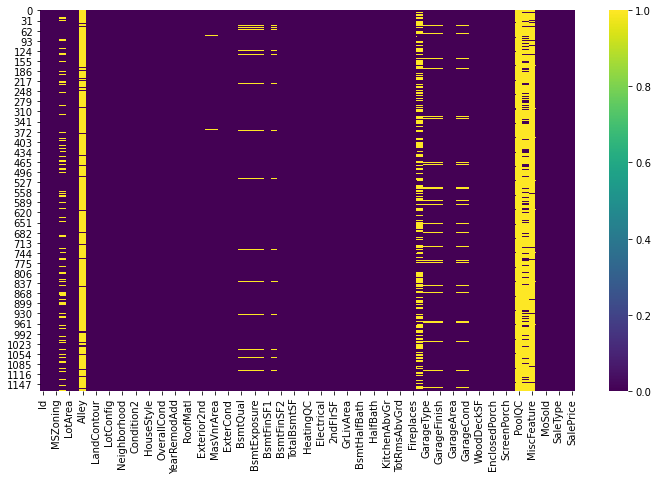

In [13]:
#Plot null values to check if any

plt.figure(figsize=(12,7))
sns.heatmap(train_data.isna(),cmap='viridis')
plt.show()


In [14]:
#checking for the duplicate values
any(train_data.duplicated())

False

It is clear that there is no duplicate values present in the dataset.

Lets missing value counts and its percentages at each level of handling the missing values.

In [15]:
train_data.nunique()  # check the no. of unique values in dataset


Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

"Id" contains full unique data in each row, hence it doesn't contribute to predict the Sale Price. Let's remove thsi column

In [16]:
train_data.drop(columns = 'Id',inplace=True)  #to remove ID column

In [17]:
# imputing  Nan values with No Garage for GarageType,GarageFinish,GarageQual,GarageCond
missingGarage=['GarageType','GarageFinish','GarageQual','GarageCond']

for i in missingGarage:
    train_data[i] = train_data[i].replace(np.nan, 'No Garage')
    print(train_data[i].value_counts())
    print('-'*30)

Attchd       691
Detchd       314
BuiltIn       70
No Garage     64
Basment       16
CarPort        8
2Types         5
Name: GarageType, dtype: int64
------------------------------
Unf          487
RFn          339
Fin          278
No Garage     64
Name: GarageFinish, dtype: int64
------------------------------
TA           1050
No Garage      64
Fa             39
Gd             11
Ex              2
Po              2
Name: GarageQual, dtype: int64
------------------------------
TA           1061
No Garage      64
Fa             28
Gd              8
Po              6
Ex              1
Name: GarageCond, dtype: int64
------------------------------


<AxesSubplot:title={'center':'GarageType Vs SalePrice'}, xlabel='GarageType', ylabel='SalePrice'>

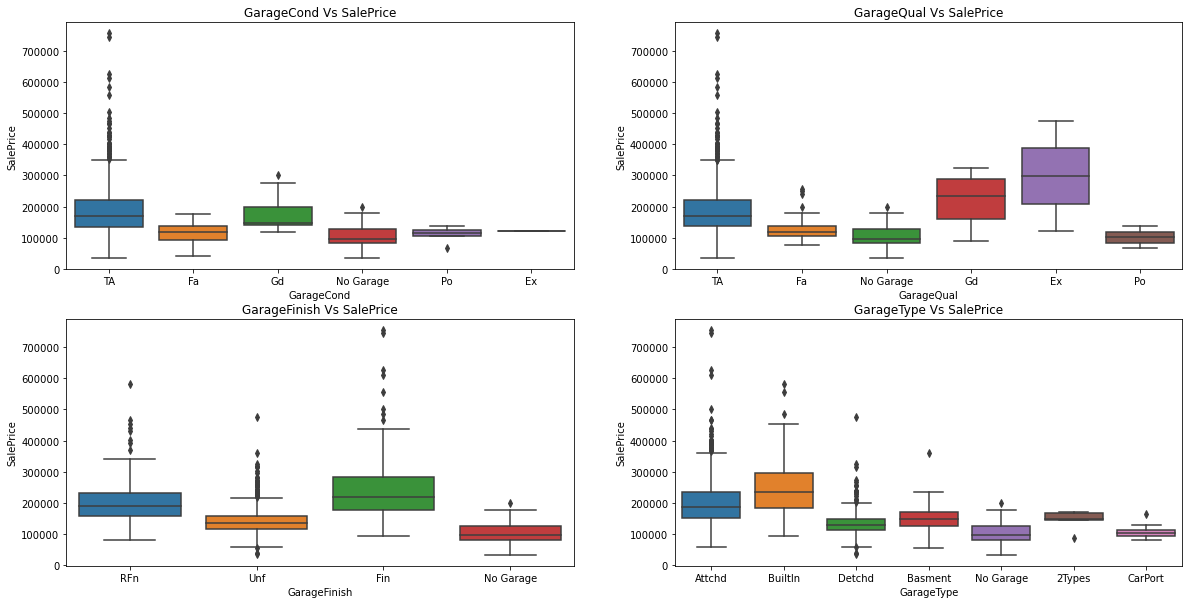

In [18]:
plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
plt.title("GarageCond Vs SalePrice")
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = train_data)

plt.subplot(2,2,2)
plt.title("GarageQual Vs SalePrice")
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = train_data)

plt.subplot(2,2,3)
plt.title("GarageFinish Vs SalePrice")
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = train_data)

plt.subplot(2,2,4)
plt.title("GarageType Vs SalePrice")
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = train_data)

From the above, we can see that GarageCond and GarageQual with less variance of the data and highly coorelated. Hence I am droping the two columns.


In [19]:
# Let's check the percentage of missing values of each column

def missing_values(train_data):
    mis_val = train_data.isnull().sum()
    mis_val_percent = 100 * train_data.isnull().sum() / len(train_data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Null', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(train_data.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values(train_data)

Your selected dataframe has 80 columns.
There are 14 columns that have missing values.


Null  % of Total Values
PoolQC        1161               99.4
MiscFeature   1124               96.2
Alley         1091               93.4
Fence          931               79.7
FireplaceQu    551               47.2
LotFrontage    214               18.3
GarageYrBlt     64                5.5
BsmtExposure    31                2.7
BsmtFinType2    31                2.7
BsmtQual        30                2.6
BsmtCond        30                2.6
BsmtFinType1    30                2.6
MasVnrType       7                0.6
MasVnrArea       7                0.6

In [20]:
features_nan=[feature for feature in train_data.columns if train_data[feature].isnull().sum()>1 and train_data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(train_data[feature].isnull().mean(),4)))

Alley: 0.9341% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.0257% missing values
BsmtCond: 0.0257% missing values
BsmtExposure: 0.0265% missing values
BsmtFinType1: 0.0257% missing values
BsmtFinType2: 0.0265% missing values
FireplaceQu: 0.4717% missing values
PoolQC: 0.994% missing values
Fence: 0.7971% missing values
MiscFeature: 0.9623% missing values


In [21]:
# list of numerical variables
numerical_features = [i for i in train_data.columns if train_data[i].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
train_data[numerical_features].head()

Number of numerical variables:  37


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120          NaN     4928            6            5       1976   
1          20         95.0    15865            8            6       1970   
2          60         92.0     9920            7            5       1996   
3          20        105.0    11751            6            6       1977   
4          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          1976         0.0         120           0  ...           0   
1          1970         0.0         351         823  ...          81   
2          1997         0.0         862           0  ...         180   
3          1977       480.0         705           0  ...           0   
4          2000       126.0        1246           0  ...         240   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   
2          130              0          0            0         0        0   
3          122              0          0            0         0        0   
4            0              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2007     128000  
1      10    2007     268000  
2       6    2007     269790  
3       1    2010     190000  
4       6    2009     215000  

[5 rows x 37 columns]

In [22]:
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('None')
    return data

train_data=replace_cat_feature(train_data,features_nan)

train_data[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [26]:
discrete_feature=[feature for feature in numerical_features 
                  if len(train_data[feature].unique())<25 and 
                  feature not in year_feature]
print("Count of Discrete Variables is:",len(discrete_feature))


discrete_feature

Count of Discrete Variables is: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

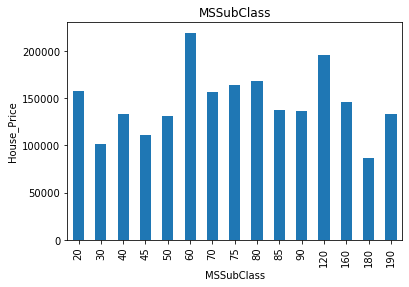

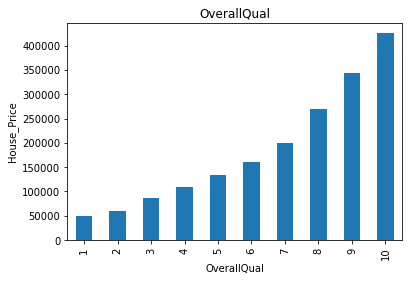

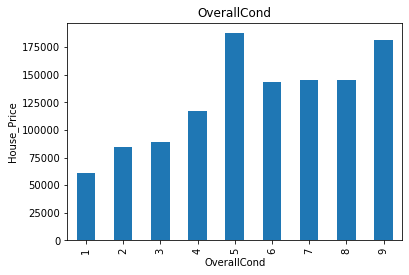

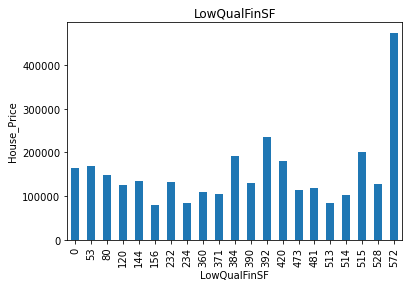

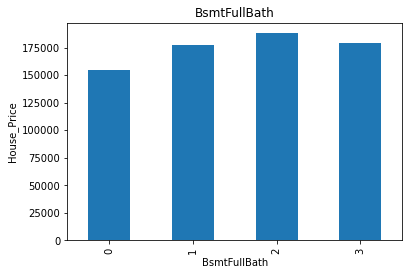

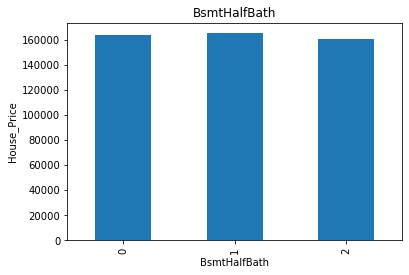

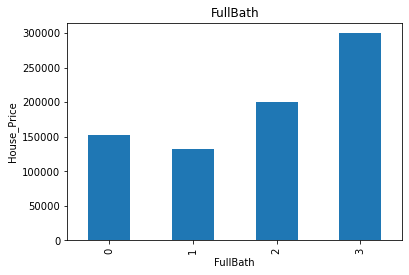

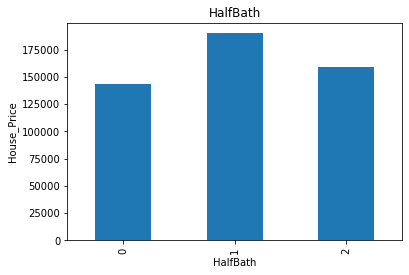

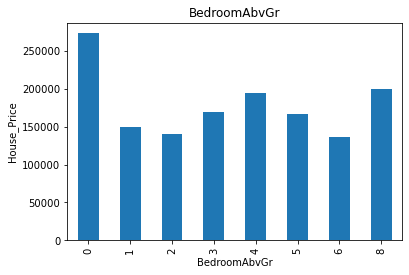

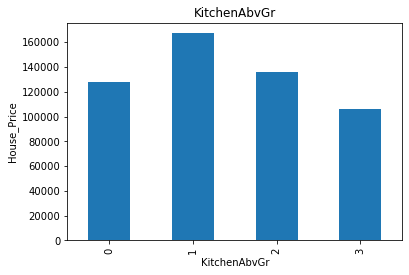

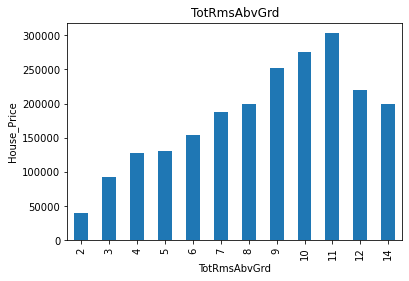

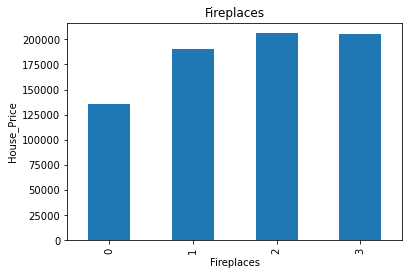

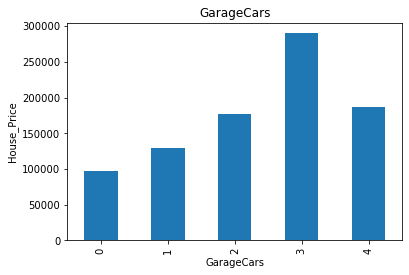

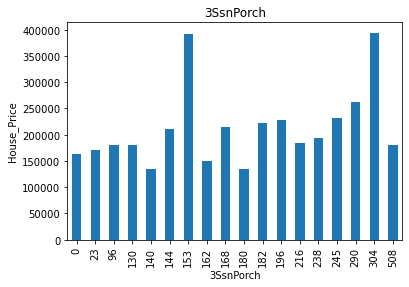

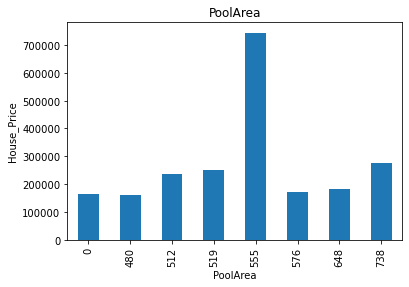

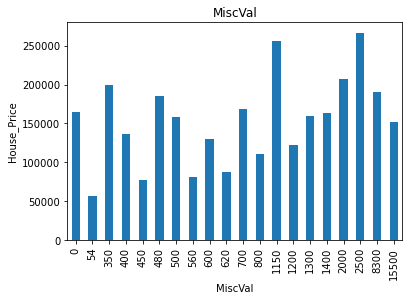

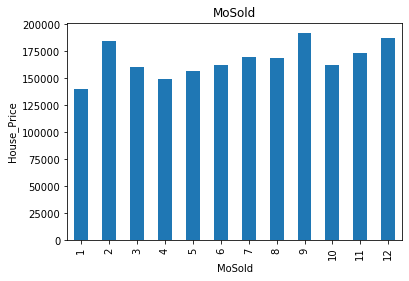

In [27]:
# All Discrete Features vs House Prices

for feature in discrete_feature:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('House_Price')
    plt.title(feature)
    plt.show()

In [28]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count",len(continuous_feature))

continuous_feature


Continuous feature Count 16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

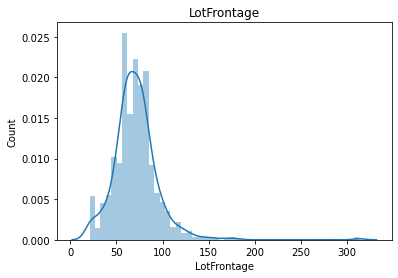

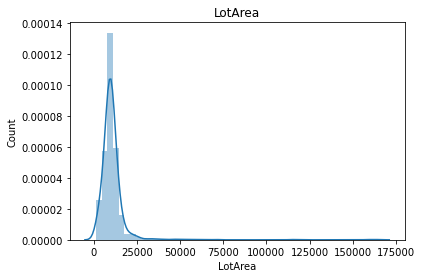

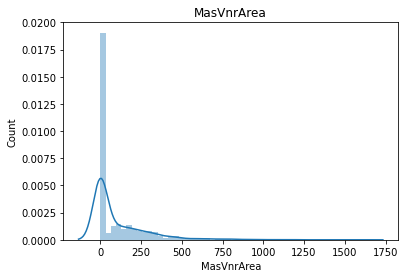

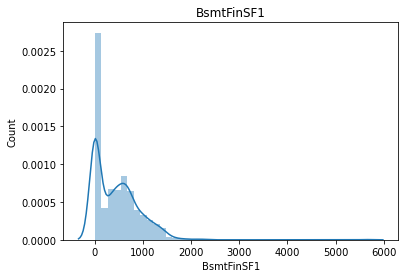

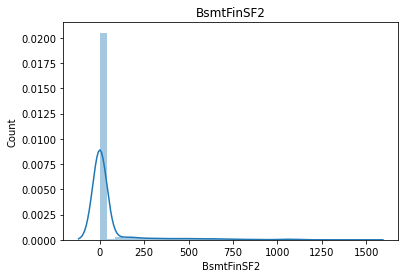

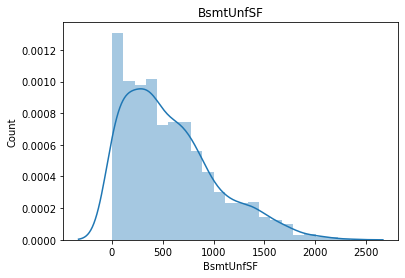

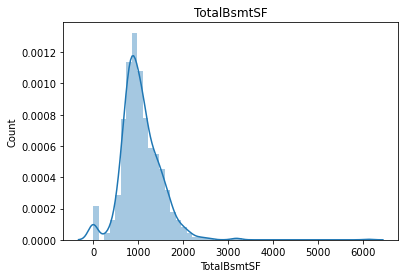

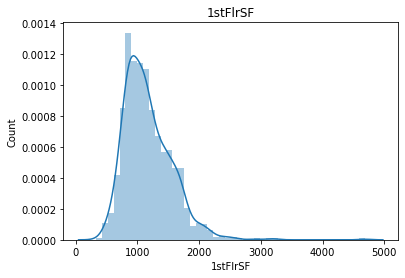

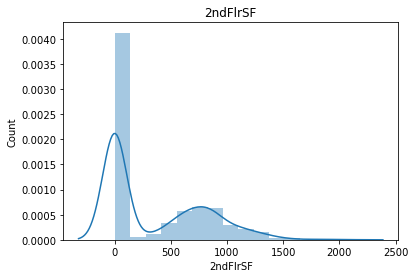

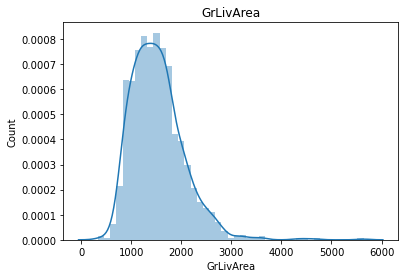

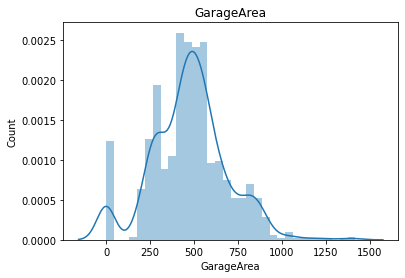

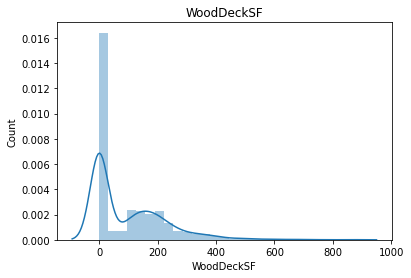

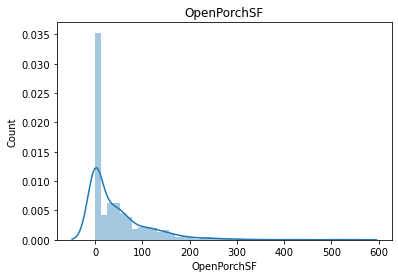

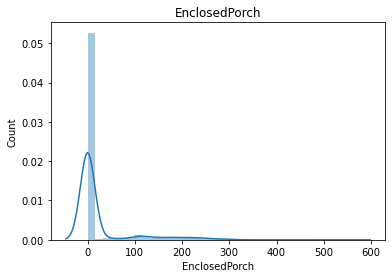

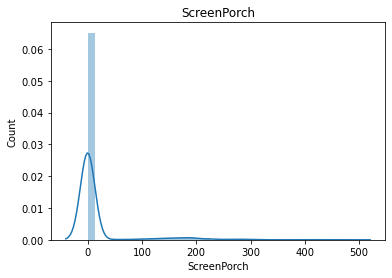

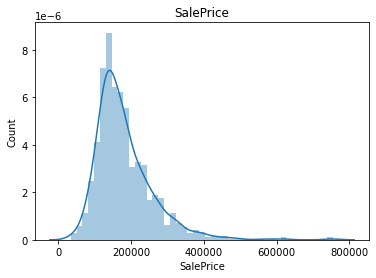

In [29]:
## Lets analyse the continuous values by creating distribution plots to understand the distribution

for i in continuous_feature:
    data=train_data.copy()
    sns.distplot(data[i])
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()

In [30]:
categorical_features=[feature for feature in train_data.columns if train_data[feature].dtypes=='O']
train_data[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave  None      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave  None      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave  None      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave  None      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      NPkVill       Norm  ...     Attchd          RFn         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      NoRidge       Norm  ...     Attchd          Unf         TA         TA   
3       NWAmes       Norm  ...     Attchd          RFn         TA         TA   
4       NWAmes       Norm  ...     Attchd          Fin         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y   None   None        None       WD        Normal  
1          Y   None   None        None       WD        Normal  
2          Y   None   None        None       WD        Normal  
3          Y   None  MnPrv        None      COD        Normal  
4          Y   None   None        None       WD        Normal  

[5 rows x 43 columns]

In [31]:
for feature in categorical_features:
    print('{} has {} categories'.format(feature,len(train_data[feature].unique())))

MSZoning has 5 categories
Street has 2 categories
Alley has 3 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 1 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 14 categories
Exterior2nd has 15 categories
MasVnrType has 4 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 5 categories
BsmtCond has 5 categories
BsmtExposure has 5 categories
BsmtFinType1 has 7 categories
BsmtFinType2 has 7 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 5 categories
KitchenQual has 4 categories
Functional has 7 categories
FireplaceQu has 6 categories
GarageType has 7 categories
GarageFinish has 4 categories
GarageQual has 6 categories
Garag

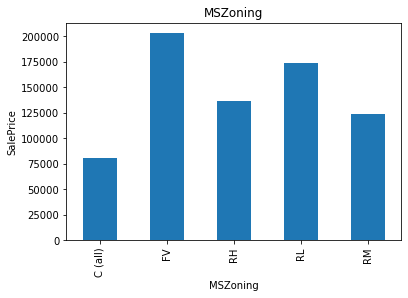

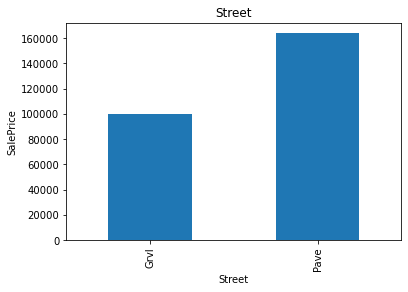

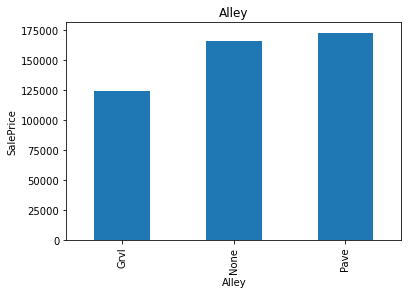

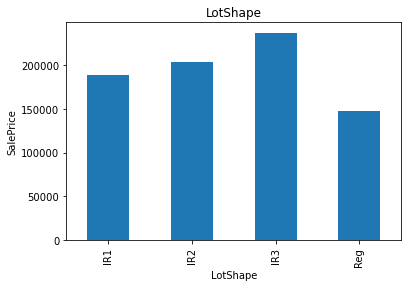

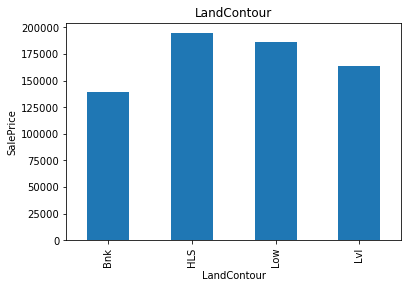

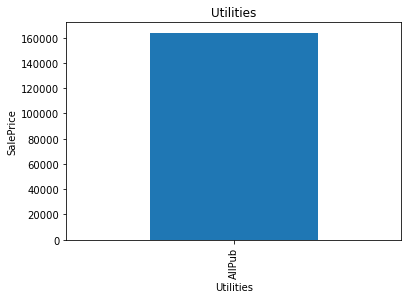

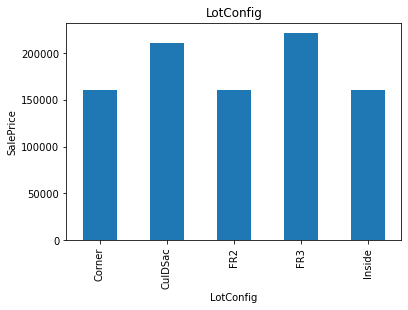

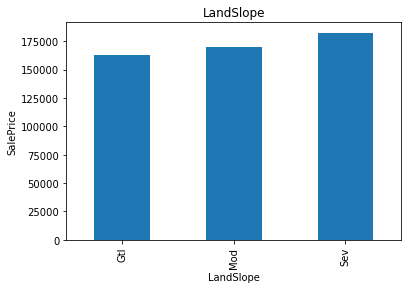

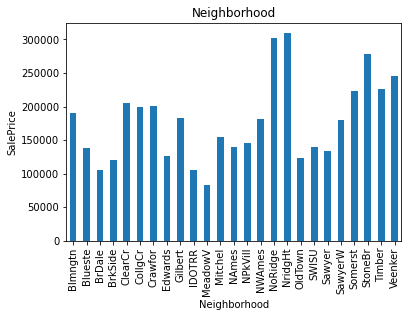

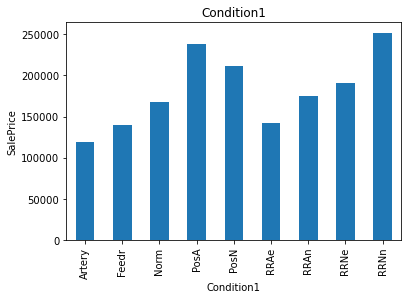

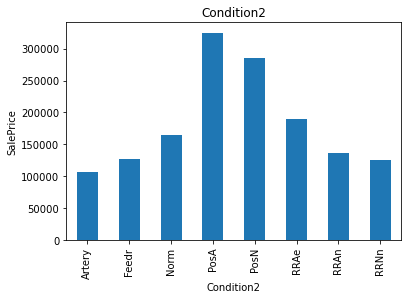

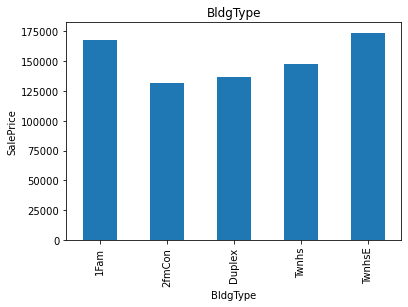

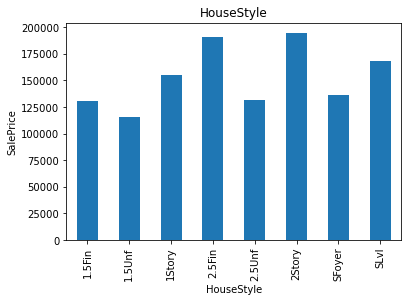

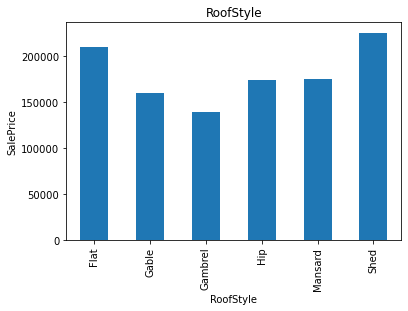

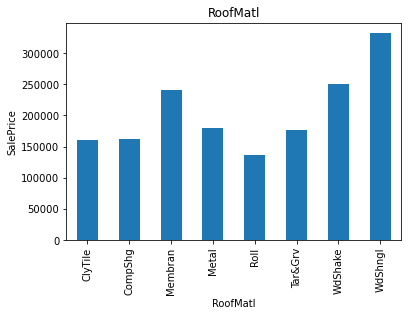

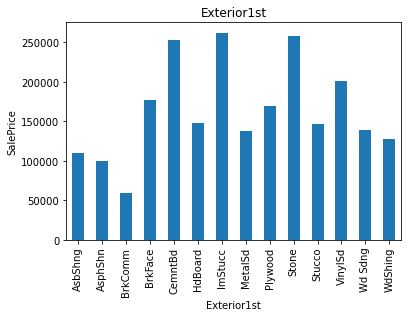

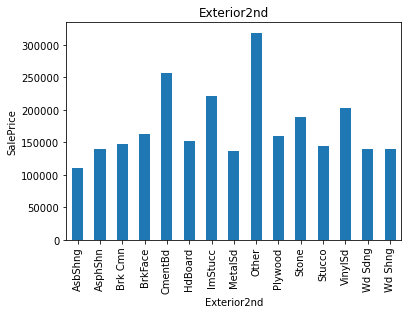

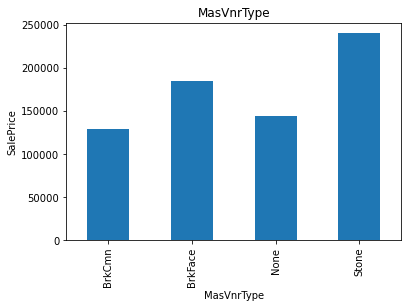

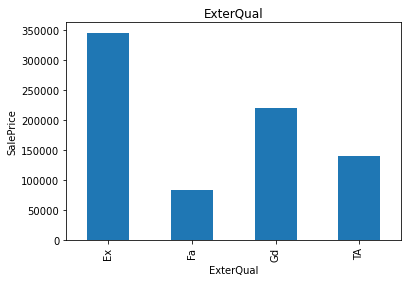

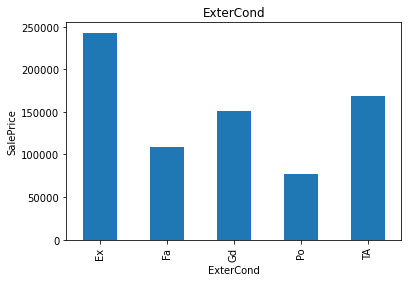

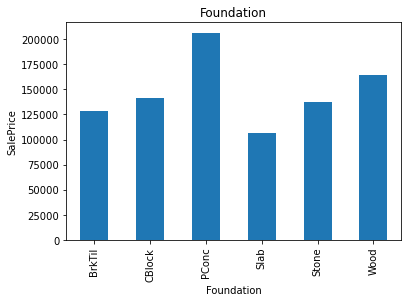

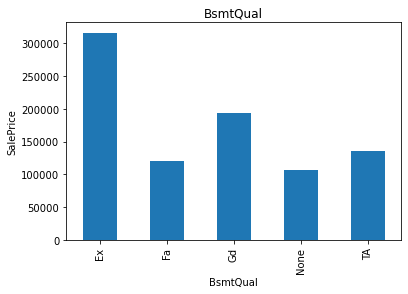

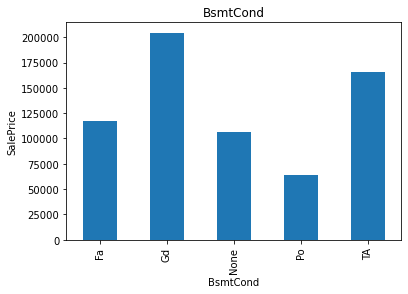

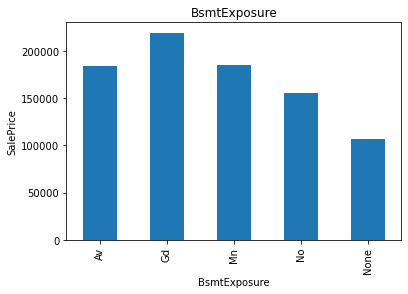

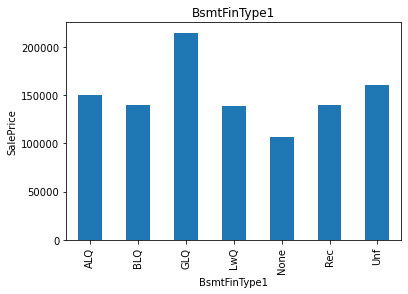

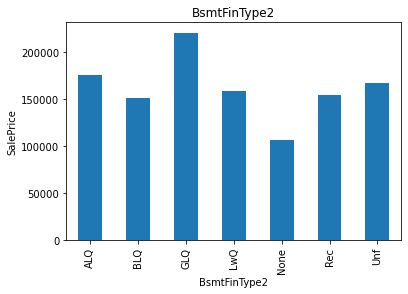

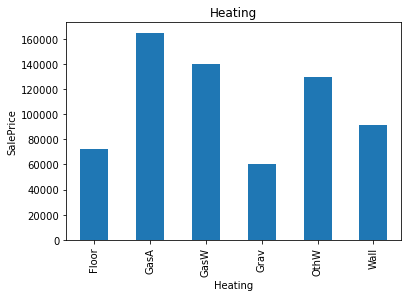

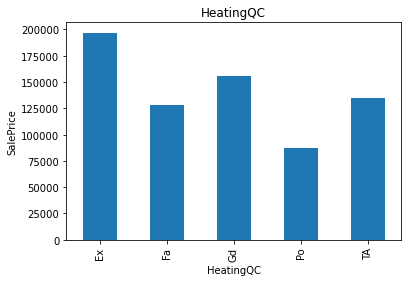

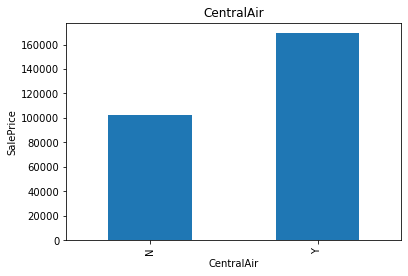

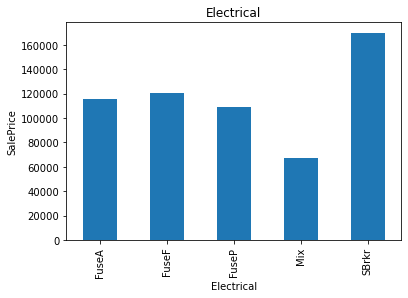

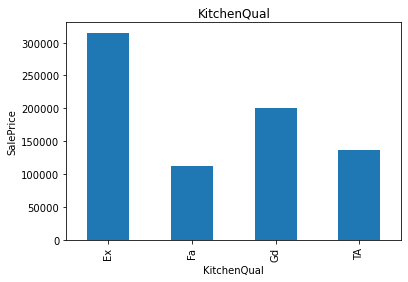

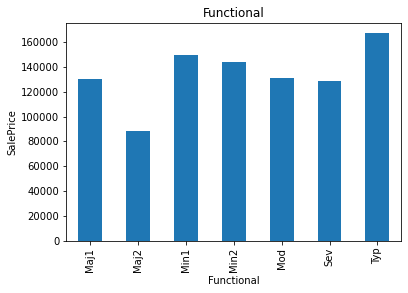

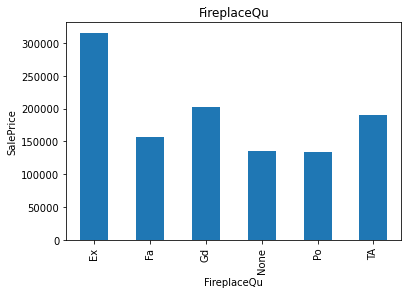

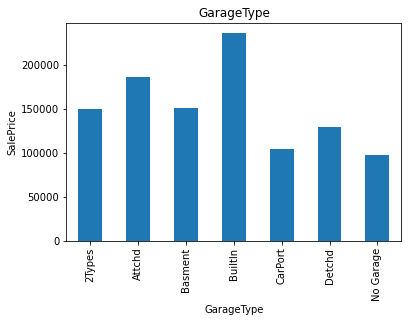

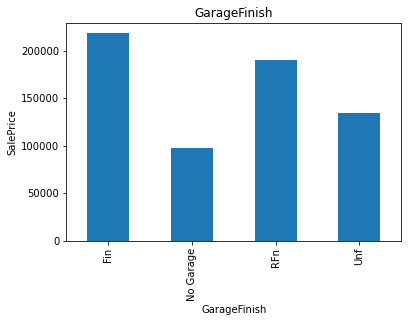

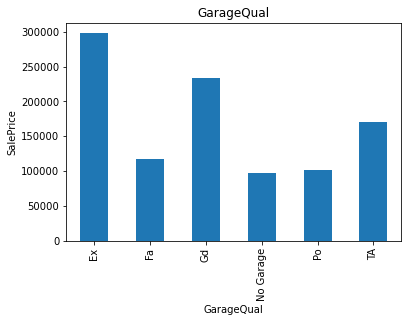

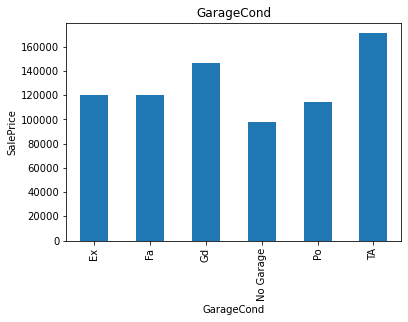

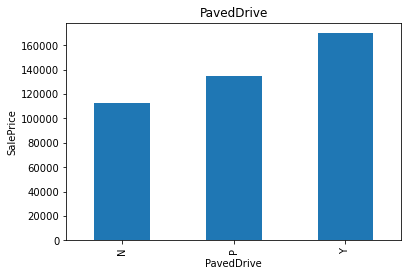

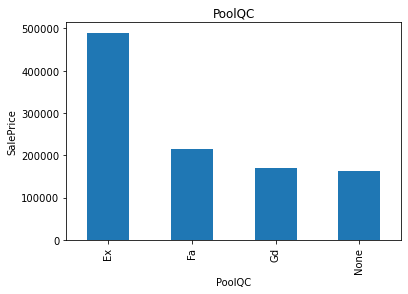

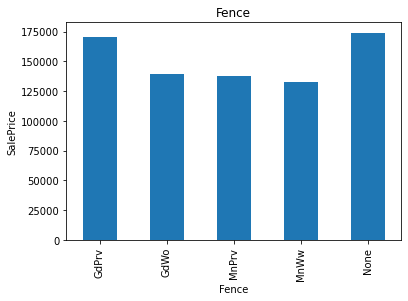

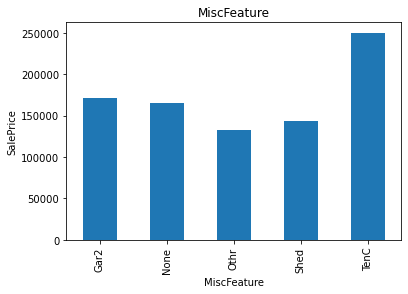

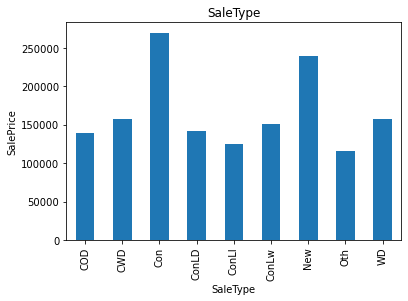

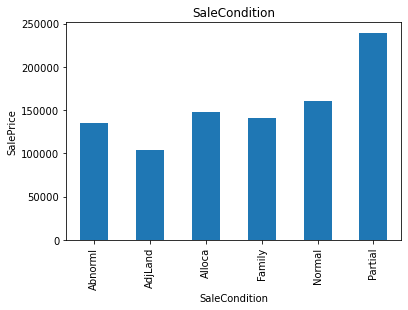

In [32]:
# Categorical variables vs SalesPrice
for feature in categorical_features:
    data=train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [33]:
# All Null Values in categorical Features are treated, Now let's check for numerical variables
numerical_with_nan=[feature for feature in train_data.columns if train_data[feature].isnull().sum()>1 and train_data[feature].dtypes!='O']

# I am displaying the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}".format(feature,np.around(train_data[feature].isnull().mean(),4)))

LotFrontage: 0.1832
MasVnrArea: 0.006
GarageYrBlt: 0.0548


In [34]:
# Replacing by using median since there are outliers
for feature in numerical_with_nan:
    median_value=train_data[feature].median()
    train_data[feature].fillna(median_value,inplace=True)
    
train_data[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

Text(0.5, 1.0, 'Mean House Price vs YearSold')

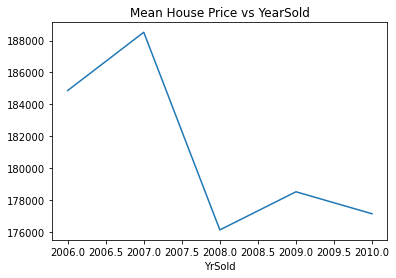

In [24]:
# Analyzing Prices of House vs Year Built
train_data.groupby('YrSold')['SalePrice'].mean().plot()
plt.title("Mean House Price vs YearSold")

In [23]:
# identified features with Year using key words 'year' or 'yr' in column headers
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [36]:
# Now, as there were some features(Temporal) which contained year values,let's change them to difference from year of Sale
years=['YearBuilt','YearRemodAdd','GarageYrBlt']
for feature in years:
    train_data[feature]=train_data['YrSold']-train_data[feature]
    
train_data[years].head()


YearBuilt  YearRemodAdd  GarageYrBlt
0         31            31         30.0
1         37            37         37.0
2         11            10         10.0
3         33            33         33.0
4         32             9         32.0

---------

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

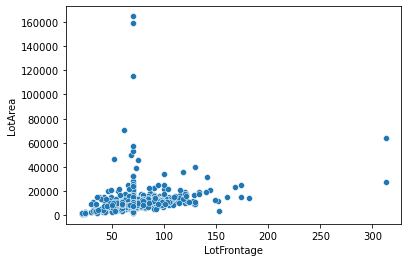

In [38]:
sns.scatterplot(x = 'LotFrontage', y = 'LotArea', data = train_data )


<AxesSubplot:xlabel='MasVnrArea'>

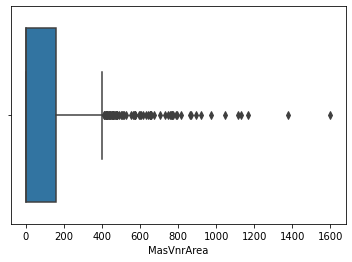

In [50]:
sns.boxplot(x='MasVnrArea', data=train_data)


In [39]:
#Checking the unique values for the columns
train_data['Fence'].value_counts()

None     931
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [40]:
#Checking the unique values for the columns
train_data['Alley'].value_counts()

None    1091
Grvl      41
Pave      36
Name: Alley, dtype: int64

In [41]:
#Checking the unique values for the columns
train_data['MiscFeature'].value_counts()

None    1124
Shed      40
Gar2       2
Othr       1
TenC       1
Name: MiscFeature, dtype: int64

In [42]:
#Checking the unique values for the columns
train_data['PoolQC'].value_counts()

None    1161
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

As per the observations of no of rows missing and the data dictionary provided:

1) Pool Qc is having the value of NaN and as per the dictionary we can say that if house doesnt have a pool the value can be NA, which is as equal to NaN , i.e. no pool. and if we see that there is no much of variance in the data as 99.52 % of data is NA/ NaN. So we can drop this column

2) We can also drop the 'MiscFeature' col, as there wont be much of variance in it also as the null values at 96.30 %, same with Alley @ 93.77%, Fence @80.75%

### Removing the variables from the dataset which have more then 80% missing data for ex: 'Alley','MiscFeature','PoolQC','Fence'

In [43]:
#droping the values which are having more than 80% of missing values

train_data = train_data.drop(columns = ['Alley','MiscFeature','PoolQC','Fence'])


In [44]:

print(train_data['Utilities'].value_counts())
print('-'*30)
print(train_data['Street'].value_counts())

AllPub    1168
Name: Utilities, dtype: int64
------------------------------
Pave    1164
Grvl       4
Name: Street, dtype: int64


- train_data['Utilities'] - contains only a single data for all the rows
- train_data['Street'] - contains only 2 values with low variance and 1 value contains more that 98% rows covered and rest covered by second value

Let's remove both the columns

In [45]:
train_data = train_data.drop(['Utilities','Street'], axis = 'columns')  #drop columns: "Utilities" and "Street"

In [37]:
train_data.isna().sum()  #let's check the null values

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

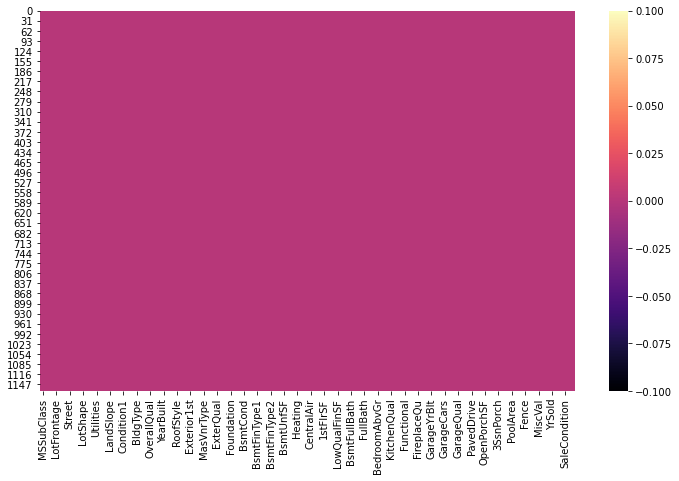

In [35]:
#Plot null values to check if any

plt.figure(figsize=(12,7))
sns.heatmap(train_data.isna(),cmap='magma')
plt.show()


Our dataset doesn't have any more null values

-----------
# EDA(Exploratory Data Analysis)
 Let us explore our data and visualize it

## Visualizing the highly correlated variables with the target variable


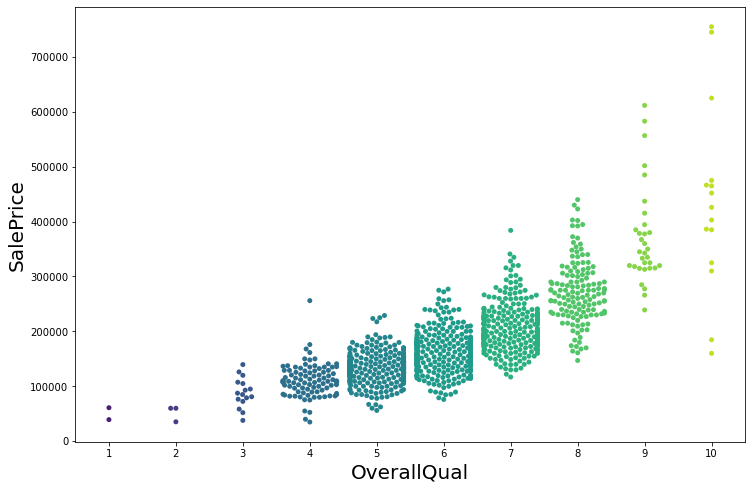

In [63]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'OverallQual',y = 'SalePrice', data = train_data, palette = 'viridis')
plt.xlabel('OverallQual', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

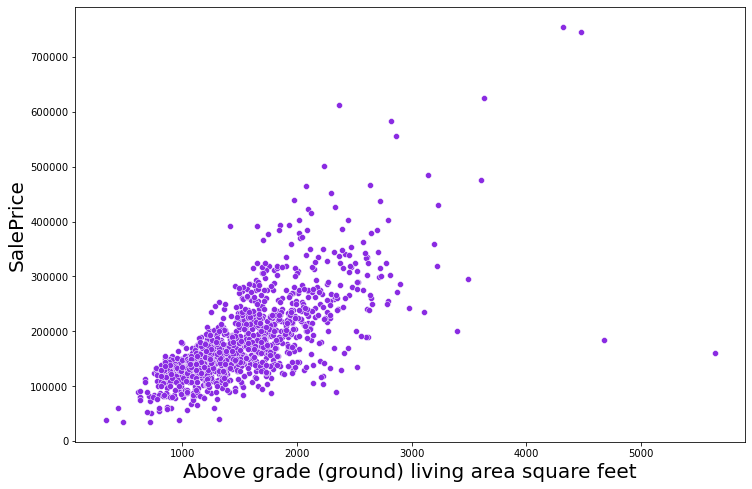

In [62]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'GrLivArea',y = 'SalePrice', data = train_data, color = 'blueviolet')
plt.xlabel('Above grade (ground) living area square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

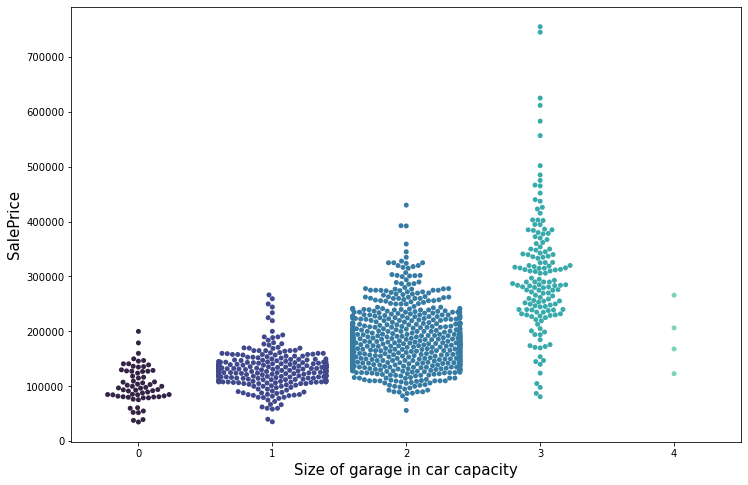

In [65]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'GarageCars',y = 'SalePrice', data = train_data, palette = 'mako')
plt.xlabel('Size of garage in car capacity', fontsize = 15)
plt.ylabel('SalePrice', fontsize = 15)
plt.show()

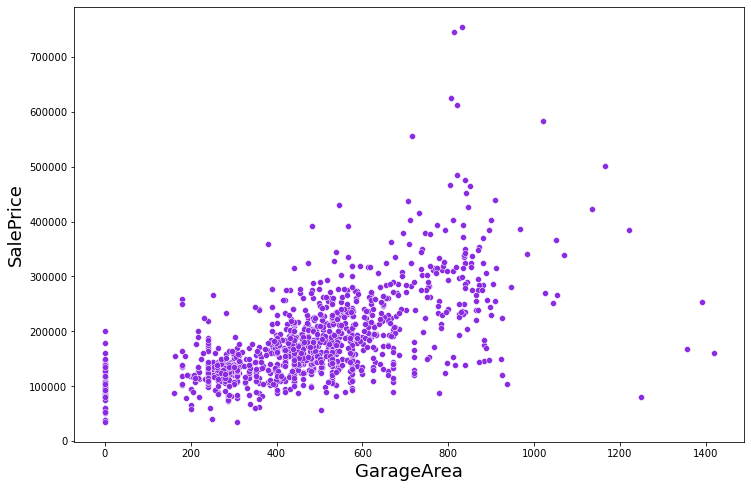

In [68]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'GarageArea',y = 'SalePrice', data = train_data, color = 'blueviolet')
plt.xlabel('GarageArea', fontsize = 18)
plt.ylabel('SalePrice', fontsize = 18)
plt.show()

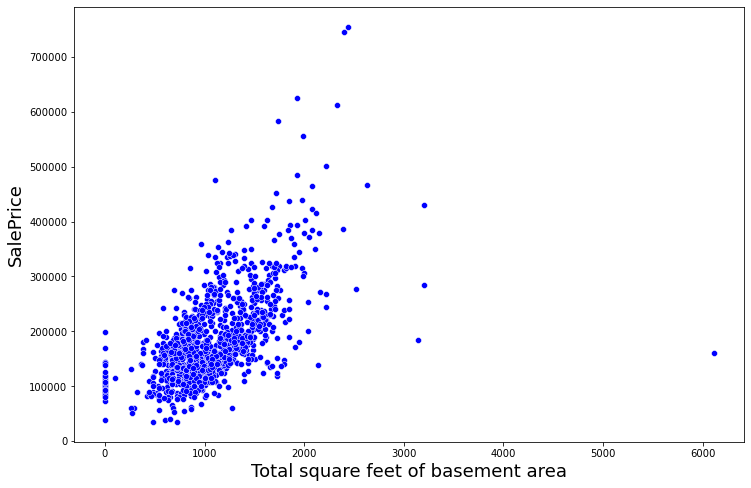

In [73]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'TotalBsmtSF',y = 'SalePrice', data = train_data, color = 'blue')
plt.xlabel('Total square feet of basement area', fontsize = 18)
plt.ylabel('SalePrice', fontsize = 18)
plt.show()

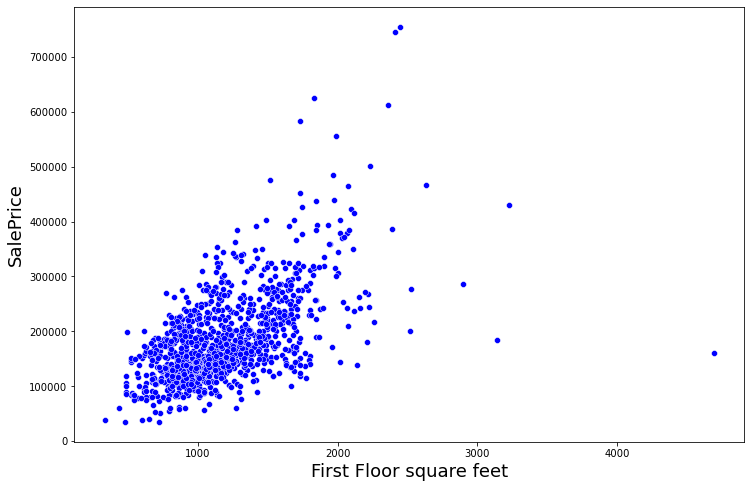

In [74]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = '1stFlrSF',y = 'SalePrice', data = train_data, color = 'blue')
plt.xlabel('First Floor square feet', fontsize = 18)
plt.ylabel('SalePrice', fontsize = 18)
plt.show()

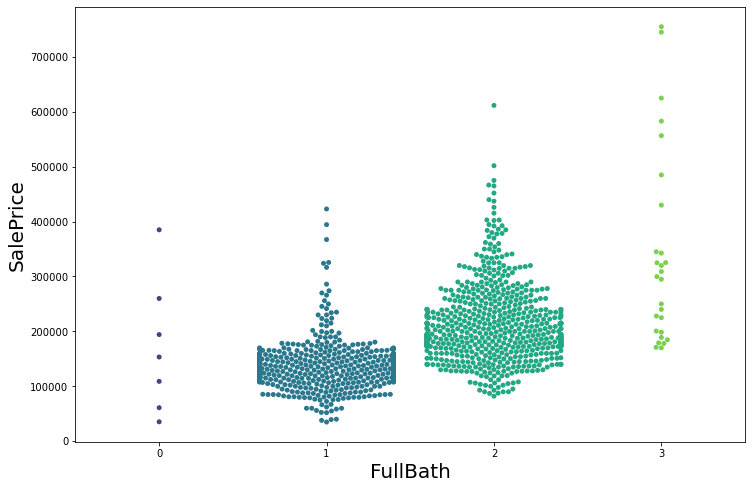

In [76]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'FullBath',y = 'SalePrice', data = train_data, palette = 'viridis')
plt.xlabel('FullBath', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

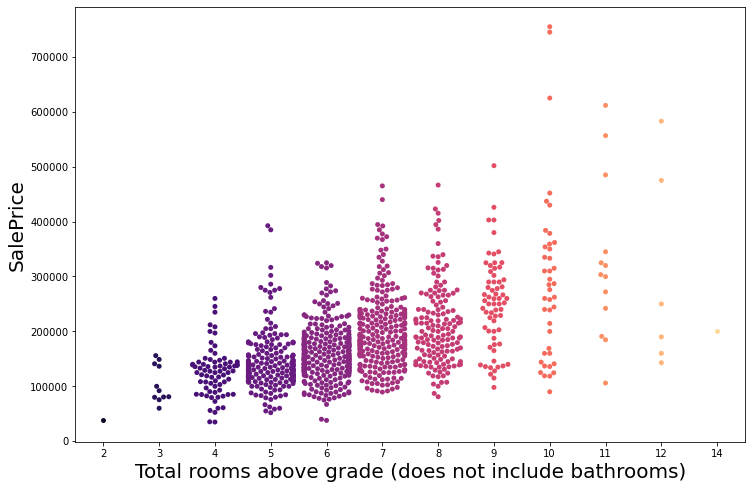

In [77]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'TotRmsAbvGrd',y = 'SalePrice', data = train_data, palette = 'magma')
plt.xlabel('Total rooms above grade (does not include bathrooms)', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

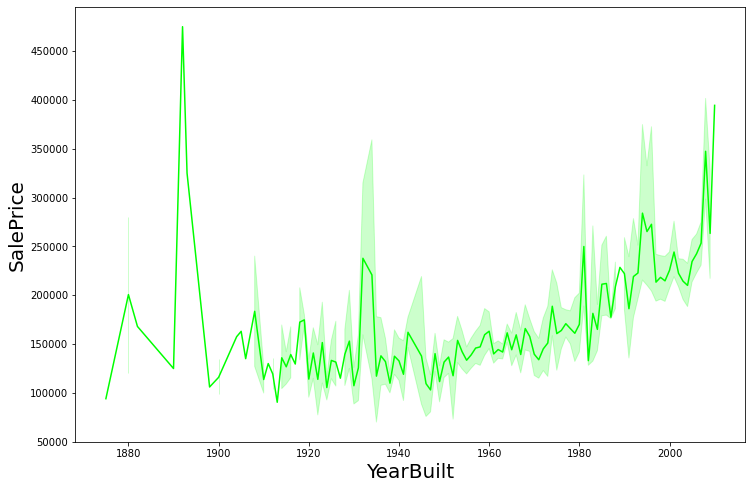

In [78]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'YearBuilt',y = 'SalePrice', data = train_data, color = 'lime')
plt.xlabel('YearBuilt', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

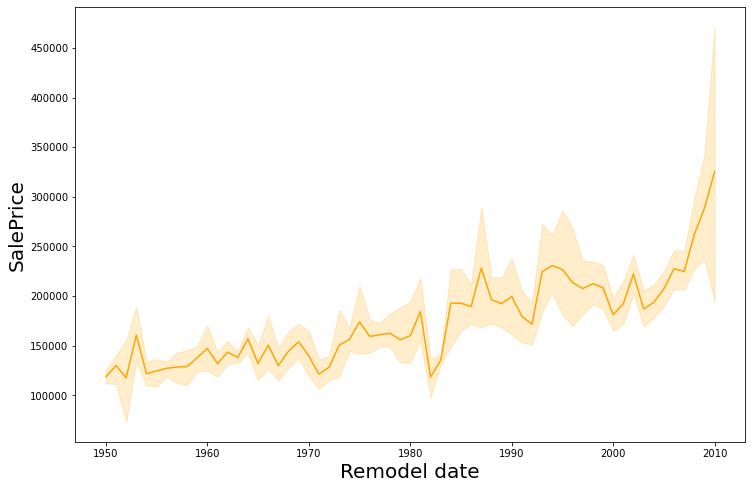

In [79]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'YearRemodAdd',y = 'SalePrice', data = train_data, color = 'Orange')
plt.xlabel('Remodel date', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

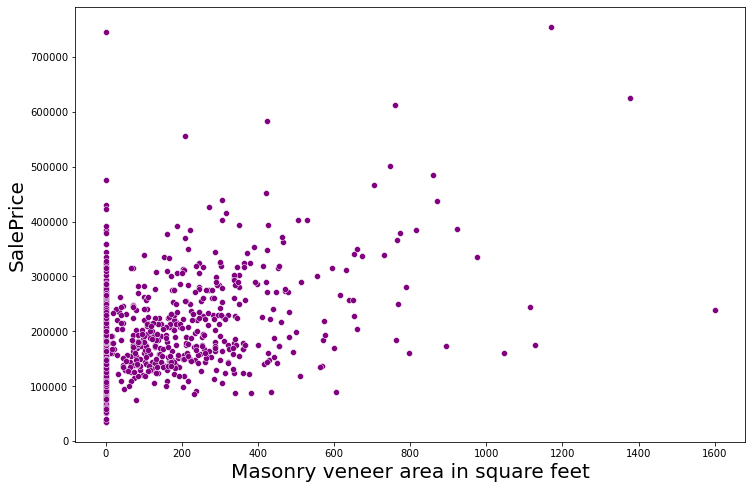

In [81]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'MasVnrArea',y = 'SalePrice', data = train_data, color = 'purple')
plt.xlabel('Masonry veneer area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

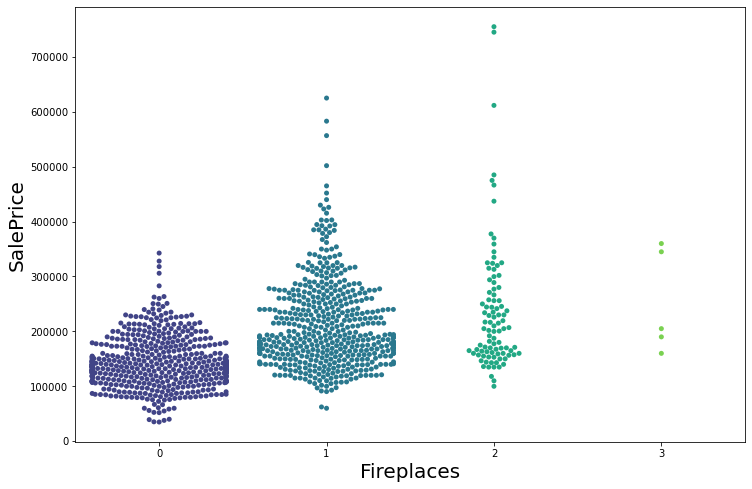

In [83]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'Fireplaces',y = 'SalePrice', data = train_data, palette = 'viridis')
plt.xlabel('Fireplaces', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

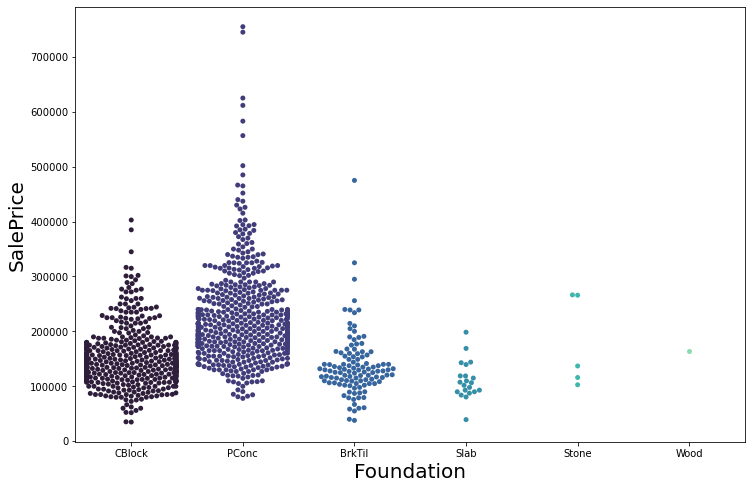

In [85]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'Foundation',y = 'SalePrice', data = train_data, palette = 'mako')
plt.xlabel('Foundation', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

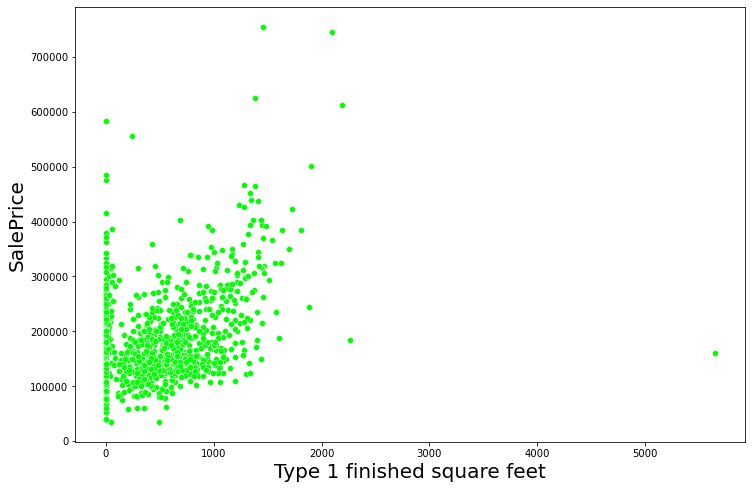

In [86]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'BsmtFinSF1',y = 'SalePrice', data = train_data, color = 'lime')
plt.xlabel('Type 1 finished square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

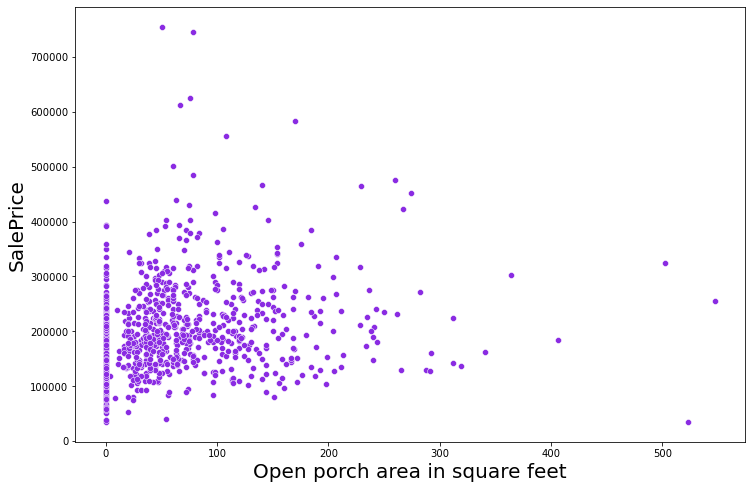

In [87]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'OpenPorchSF',y = 'SalePrice', data = train_data, color = 'blueviolet')
plt.xlabel('Open porch area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

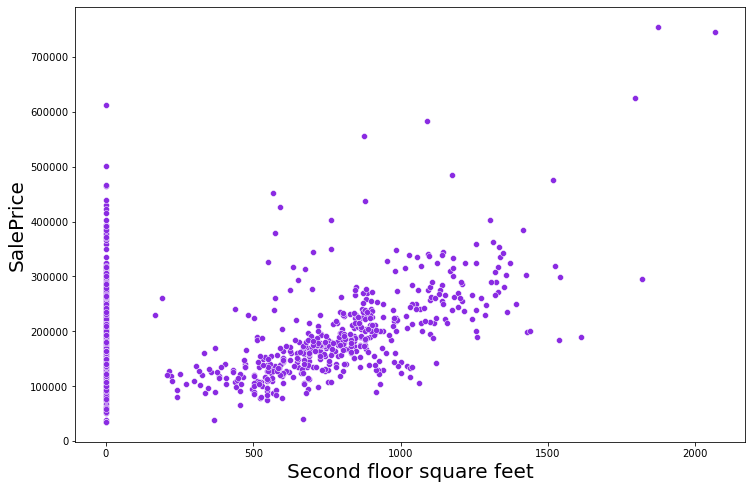

In [88]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = '2ndFlrSF',y = 'SalePrice', data = train_data, color = 'blueviolet')
plt.xlabel('Second floor square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

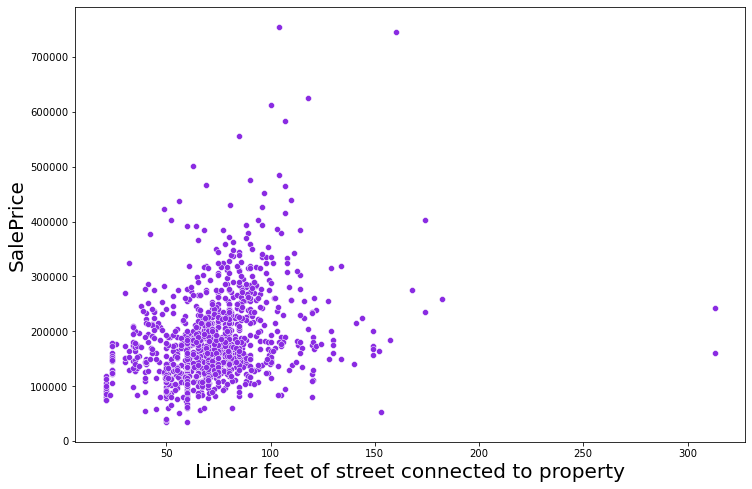

In [89]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'LotFrontage',y = 'SalePrice', data = train_data, color = 'blueviolet')
plt.xlabel('Linear feet of street connected to property', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

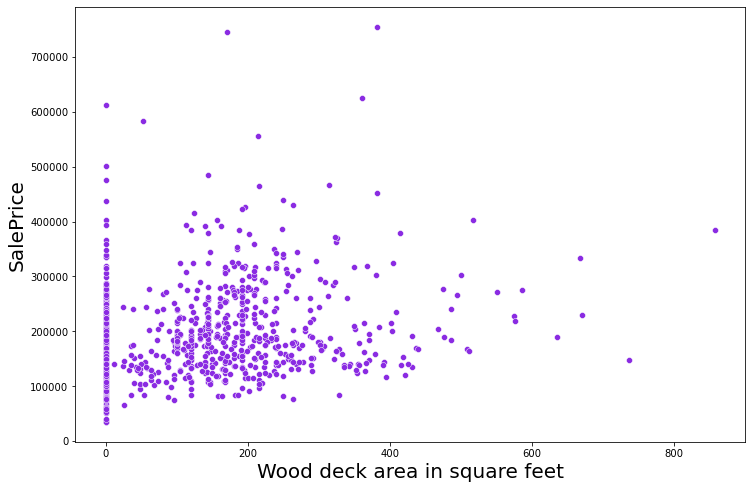

In [90]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'WoodDeckSF',y = 'SalePrice', data = train_data, color = 'blueviolet')
plt.xlabel('Wood deck area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

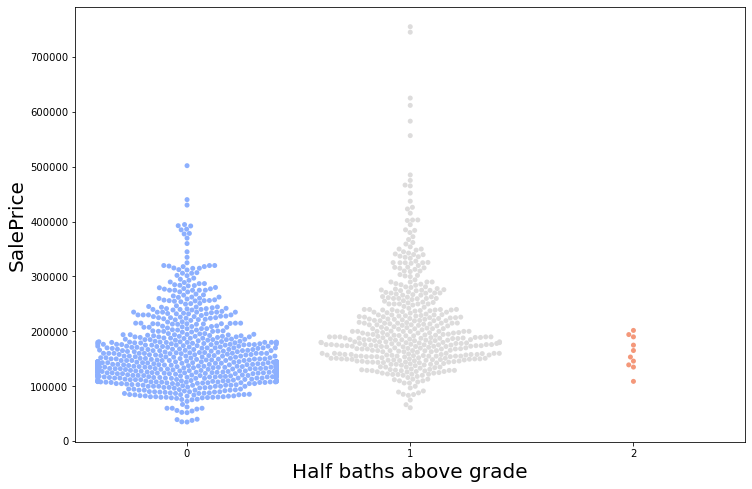

In [91]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'HalfBath',y = 'SalePrice', data = train_data, palette = 'coolwarm')
plt.xlabel('Half baths above grade', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

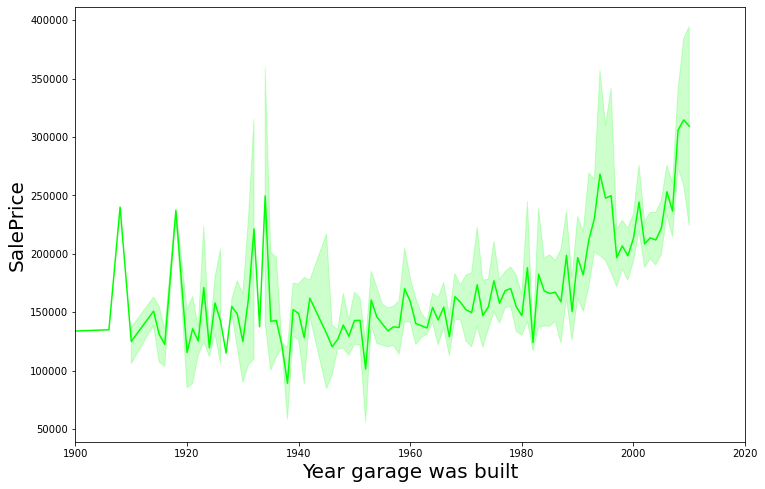

In [92]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'GarageYrBlt',y = 'SalePrice', data = train_data, color = 'lime')
plt.xlabel('Year garage was built', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.xlim([1900,2020])
plt.show()

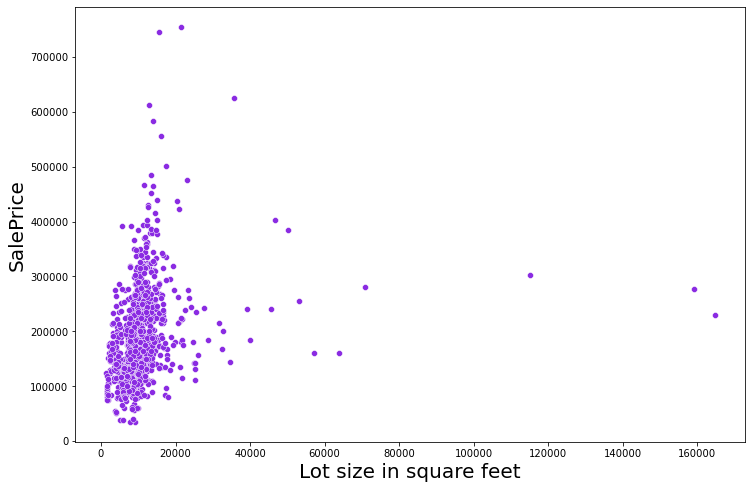

In [93]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'LotArea',y = 'SalePrice', data = train_data, color = 'blueviolet')
plt.xlabel('Lot size in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

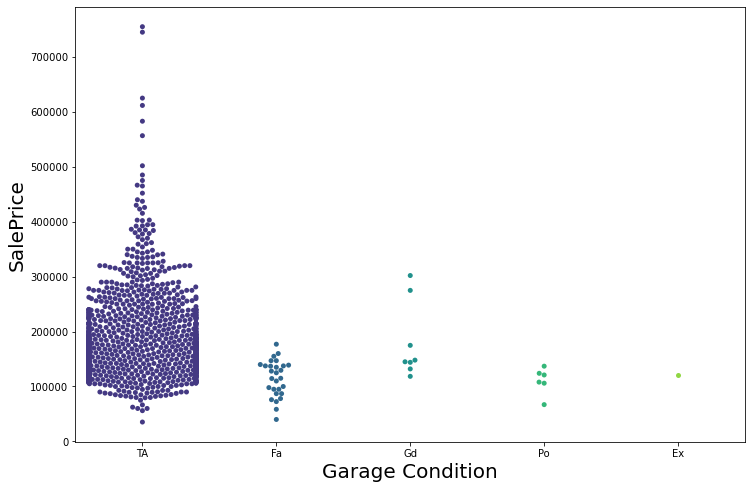

In [104]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'GarageCond',y = 'SalePrice', data = train_data, palette = 'viridis')
plt.xlabel('Garage Condition', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

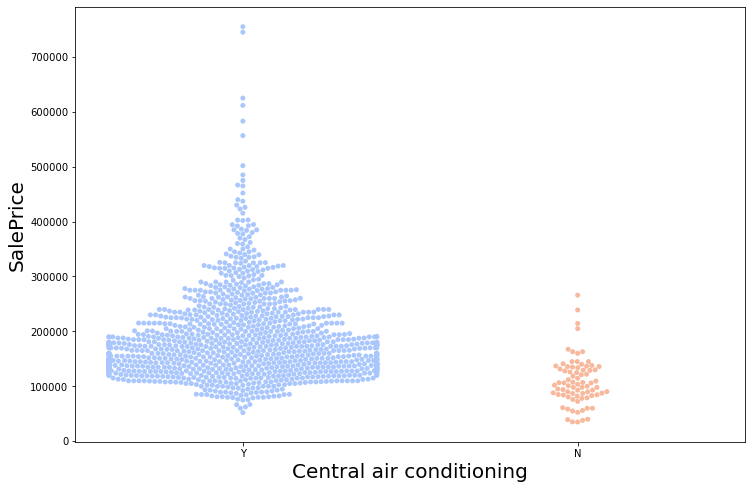

In [95]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'CentralAir',y = 'SalePrice', data = train_data, palette = 'coolwarm')
plt.xlabel('Central air conditioning', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

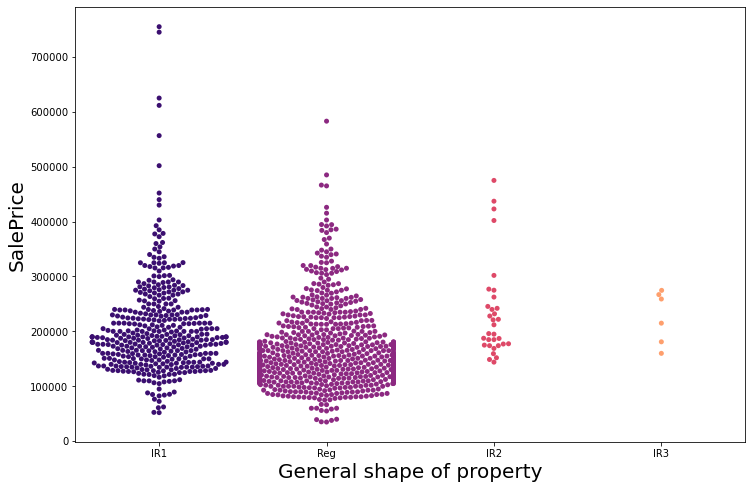

In [105]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'LotShape',y = 'SalePrice', data = train_data, palette = 'magma')
plt.xlabel('General shape of property', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

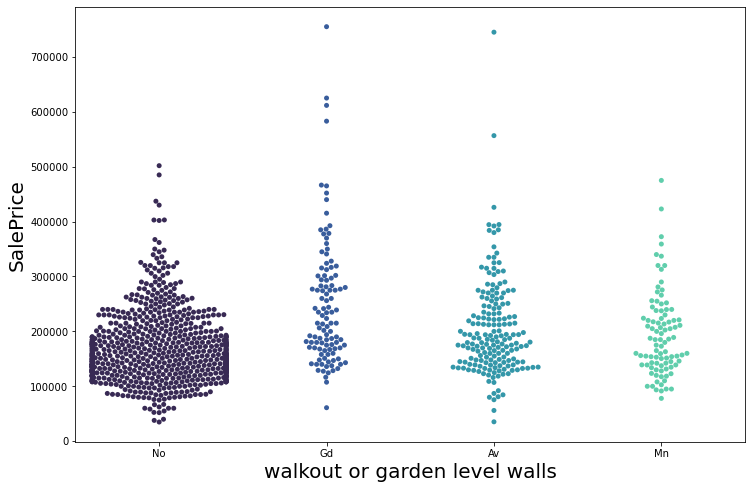

In [106]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'BsmtExposure',y = 'SalePrice', data = train_data, palette = 'mako')
plt.xlabel('walkout or garden level walls', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

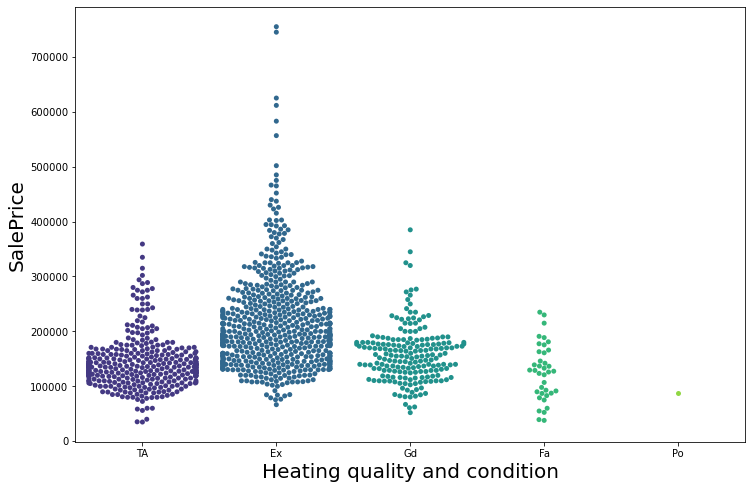

In [107]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'HeatingQC',y = 'SalePrice', data = train_data, palette = 'viridis')
plt.xlabel('Heating quality and condition', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

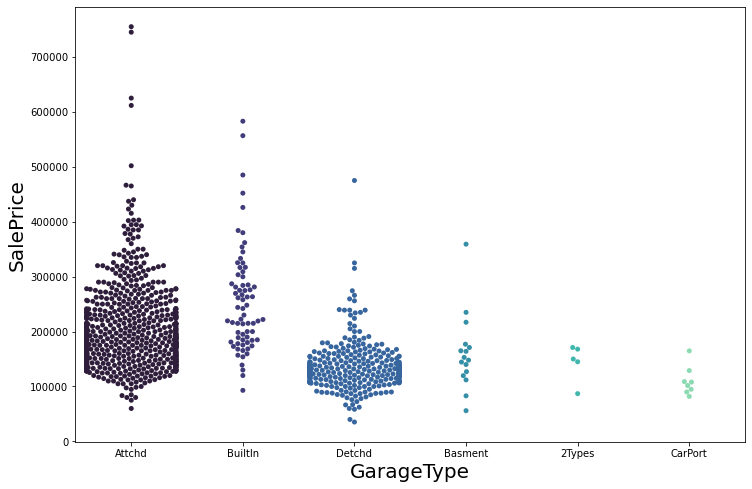

In [108]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'GarageType',y = 'SalePrice', data = train_data, palette = 'mako')
plt.xlabel('GarageType', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

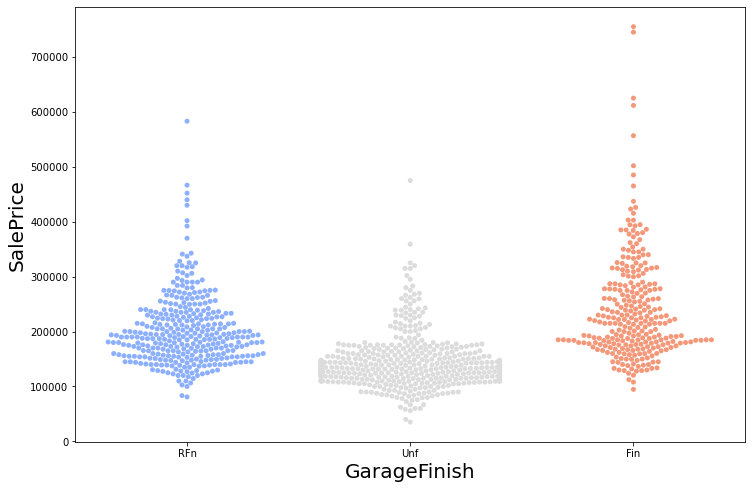

In [100]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'GarageFinish',y = 'SalePrice', data = train_data, palette = 'coolwarm')
plt.xlabel('GarageFinish', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

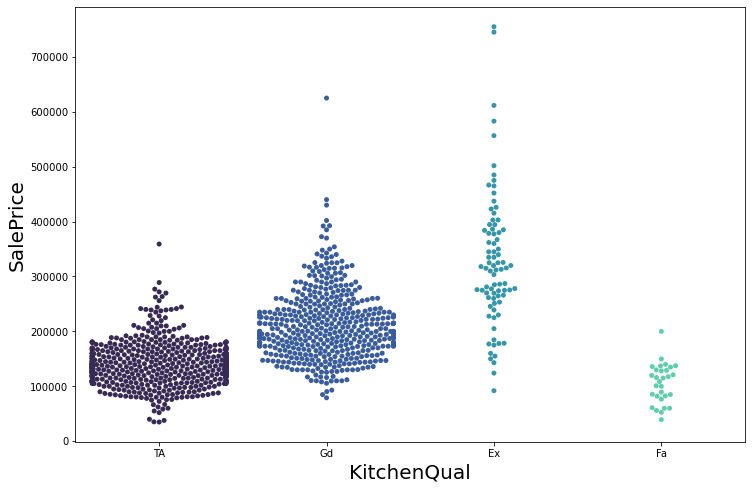

In [109]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'KitchenQual',y = 'SalePrice', data = train_data, palette = 'mako')
plt.xlabel('KitchenQual', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

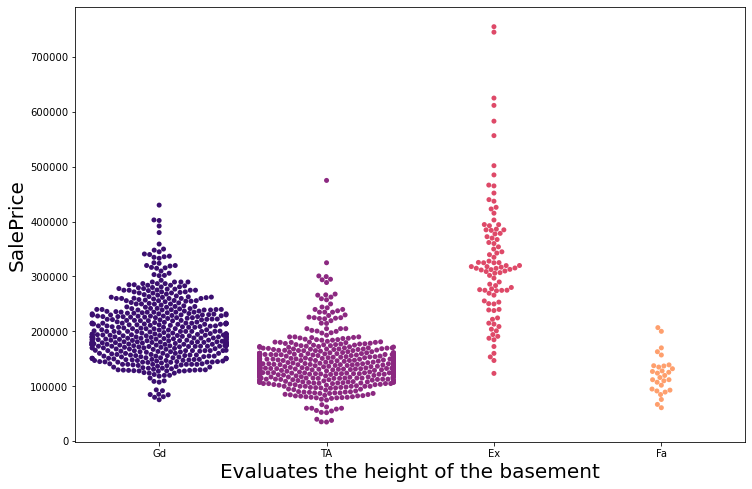

In [112]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'BsmtQual',y = 'SalePrice', data = train_data, palette = 'magma')
plt.xlabel('Evaluates the height of the basement', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

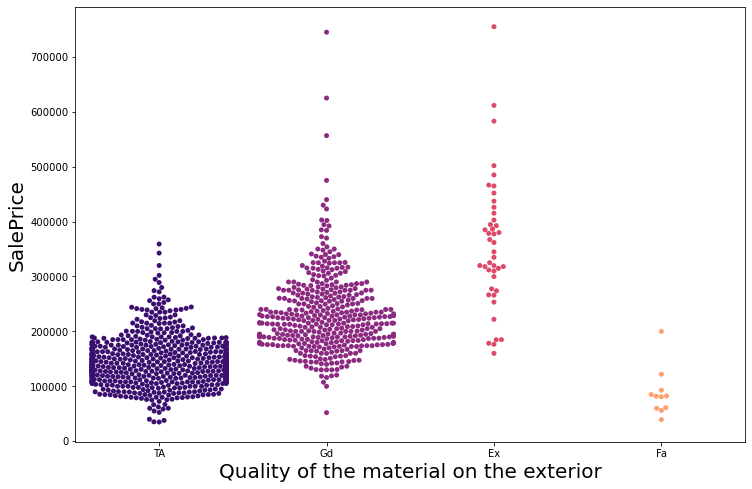

In [111]:
plt.figure(figsize = (12,8))
sns.swarmplot(x = 'ExterQual',y = 'SalePrice', data = train_data, palette = 'magma')
plt.xlabel('Quality of the material on the exterior', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.show()

-------------

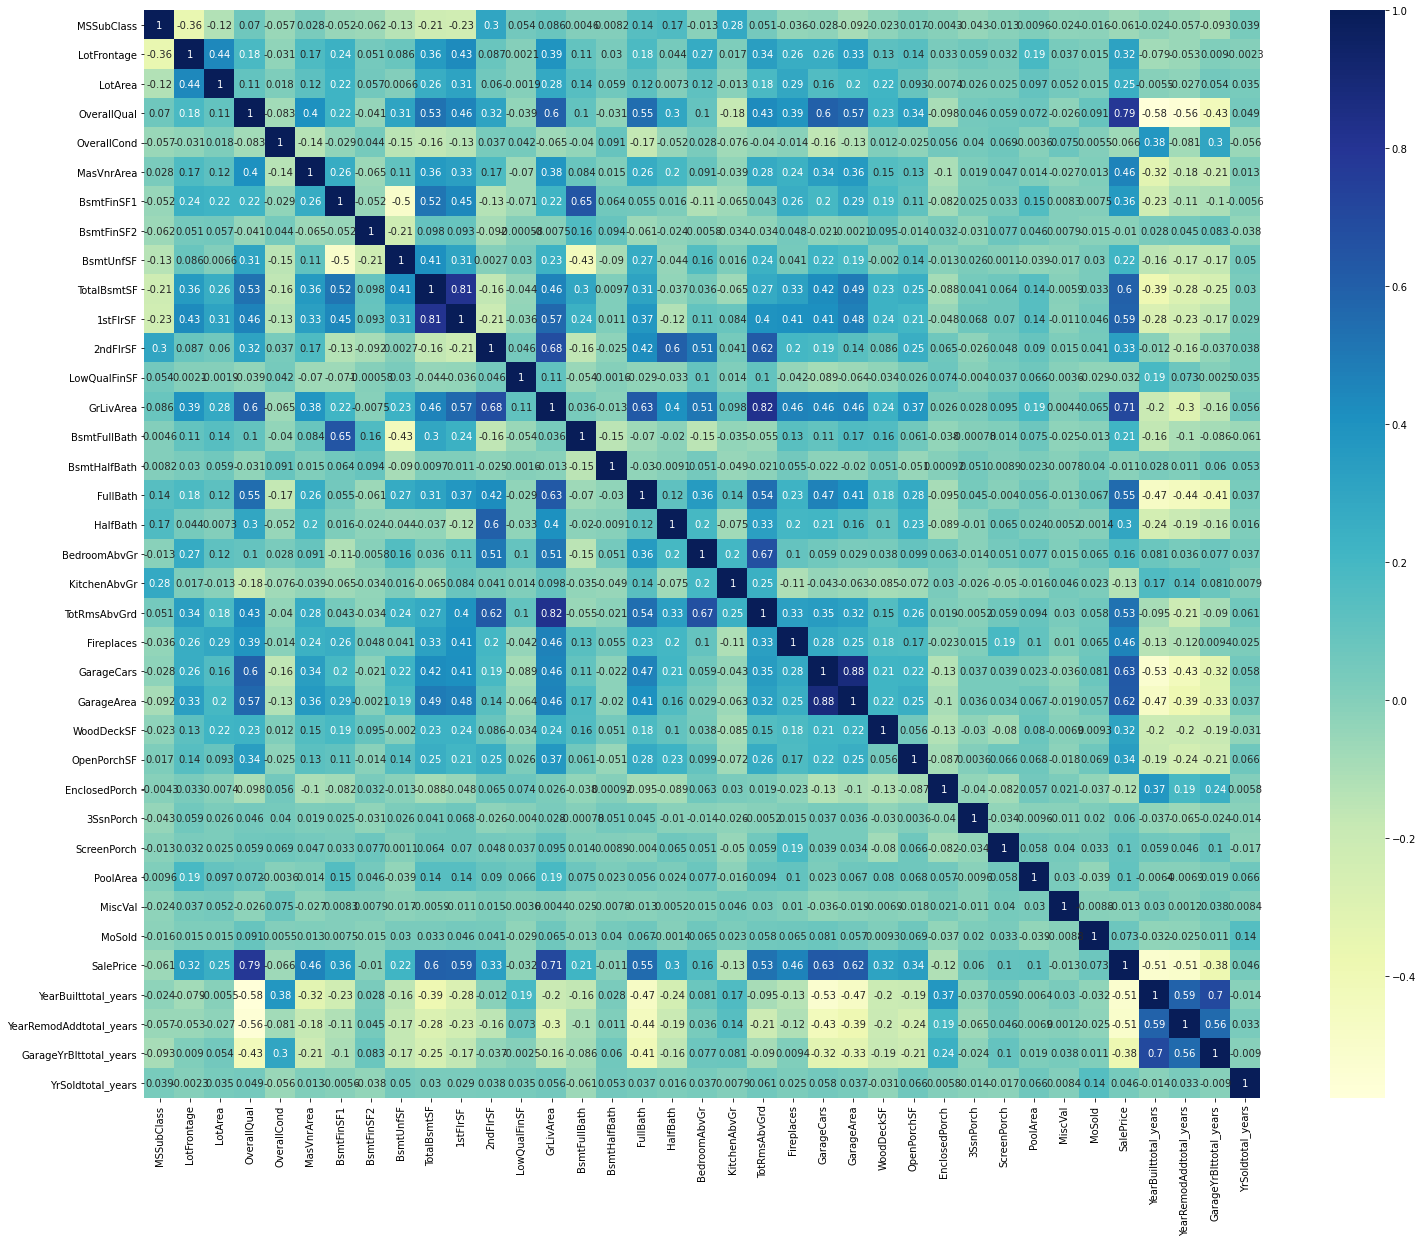

In [76]:
# figure size
plt.figure(figsize=(25,20))
# heatmap
sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [46]:
train_data.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.336234 -0.124151     0.070462    -0.056978   
LotFrontage     -0.336234     1.000000  0.296790     0.229981    -0.047851   
LotArea         -0.124151     0.296790  1.000000     0.107188     0.017513   
OverallQual      0.070462     0.229981  0.107188     1.000000    -0.083167   
OverallCond     -0.056978    -0.047851  0.017513    -0.083167     1.000000   
YearBuilt       -0.025650    -0.112006 -0.007056    -0.577035     0.379578   
YearRemodAdd    -0.059092    -0.089787 -0.029495    -0.559110    -0.077124   
MasVnrArea       0.028215     0.188273  0.120192     0.403985    -0.135133   
BsmtFinSF1      -0.052236     0.227732  0.221851     0.219643    -0.028810   
BsmtFinSF2      -0.062403     0.001253  0.056656    -0.040893     0.044336   
BsmtUnfSF       -0.134170     0.115628  0.006600     0.308676    -0.146384   
TotalBsmtSF     -0.214042     0.356180  0.259733     0.528285    -0.162481   
1stFlrSF        -0.227927     0.402864  0.312843     0.458758    -0.134420   
2ndFlrSF         0.300366     0.089816  0.059803     0.316624     0.036668   
LowQualFinSF     0.053737     0.008087 -0.001915    -0.039295     0.041877   
GrLivArea        0.086448     0.374000  0.281360     0.599700    -0.065006   
BsmtFullBath     0.004556     0.092807  0.142387     0.101732    -0.039680   
BsmtHalfBath     0.008207     0.001375  0.059282    -0.030702     0.091016   
FullBath         0.140807     0.171842  0.123197     0.548824    -0.171931   
HalfBath         0.168423     0.047149  0.007271     0.296134    -0.052125   
BedroomAbvGr    -0.013283     0.236946  0.117351     0.099639     0.028393   
KitchenAbvGr     0.283506    -0.002082 -0.013075    -0.178220    -0.076047   
TotRmsAbvGrd     0.051179     0.318941  0.184546     0.432579    -0.039952   
Fireplaces      -0.035792     0.228494  0.285983     0.390067    -0.013632   
GarageYrBlt     -0.076599    -0.054572  0.034116    -0.508474     0.304991   
GarageCars      -0.027639     0.260224  0.158313     0.596322    -0.161996   
GarageArea      -0.092408     0.322750  0.195162     0.566782    -0.126021   
WoodDeckSF      -0.022609     0.087267  0.216720     0.227137     0.012290   
OpenPorchSF      0.017468     0.151044  0.093080     0.341030    -0.024899   
EnclosedPorch   -0.004252     0.021103 -0.007446    -0.098374     0.056074   
3SsnPorch       -0.043210     0.050499  0.025794     0.045919     0.040476   
ScreenPorch     -0.013291     0.030440  0.025256     0.059387     0.069463   
PoolArea         0.009583     0.195973  0.097107     0.072247    -0.003603   
MiscVal         -0.023503    -0.002830  0.051679    -0.025786     0.075178   
MoSold          -0.016015     0.022579  0.015141     0.090638     0.005519   
YrSold          -0.038595    -0.004162 -0.035399    -0.048759     0.055517   
SalePrice       -0.060775     0.323851  0.249499     0.789185    -0.065642   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass     -0.025650     -0.059092    0.028215   -0.052236   -0.062403   
LotFrontage    -0.112006     -0.089787    0.188273    0.227732    0.001253   
LotArea        -0.007056     -0.029495    0.120192    0.221851    0.056656   
OverallQual    -0.577035     -0.559110    0.403985    0.219643   -0.040893   
OverallCond     0.379578     -0.077124   -0.135133   -0.028810    0.044336   
YearBuilt       1.000000      0.594183   -0.318639   -0.227324    0.029331   
YearRemodAdd    0.594183      1.000000   -0.179443   -0.114081    0.047157   
MasVnrArea     -0.318639     -0.179443    1.000000    0.263377   -0.064685   
BsmtFinSF1     -0.227324     -0.114081    0.263377    1.000000   -0.052145   
BsmtFinSF2      0.029331      0.047157   -0.064685   -0.052145    1.000000   
BsmtUnfSF      -0.157503     -0.177928    0.108974   -0.499861   -0.213580   
TotalBsmtSF    -0.386993     -0.282691    0.362330    0.518940    0.098167   
1stFlrSF       -0.280267     -0.2352

## Removing OUtliers

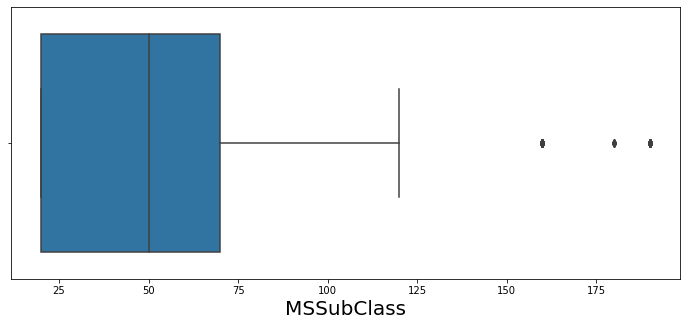

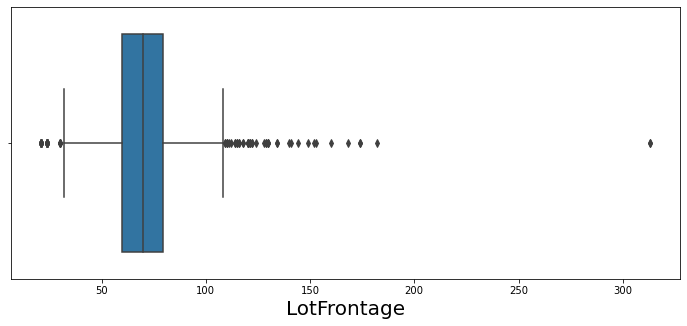

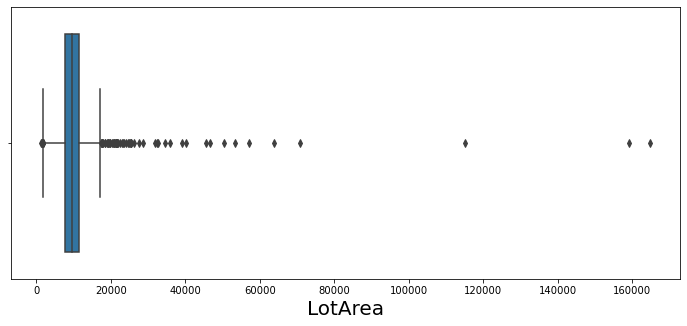

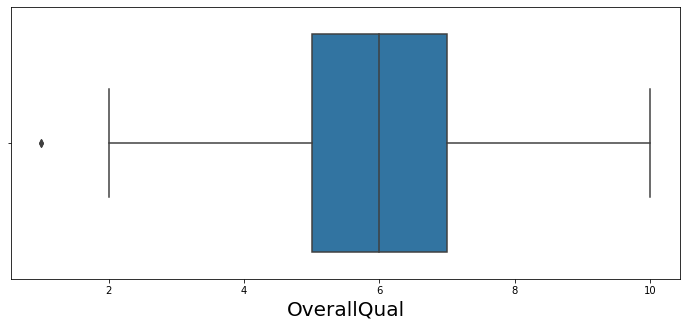

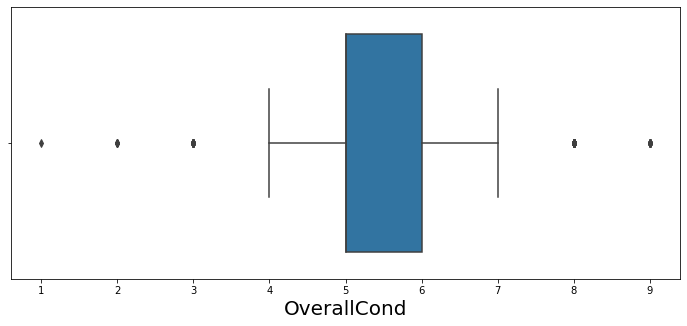

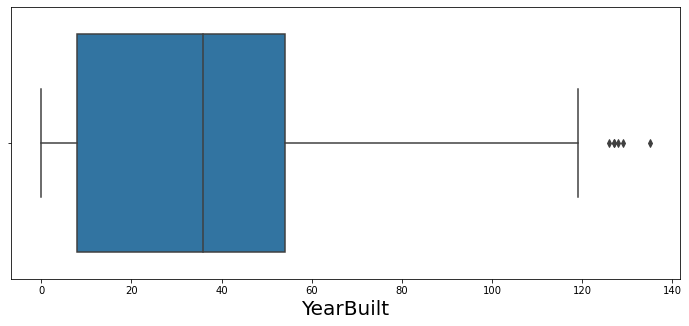

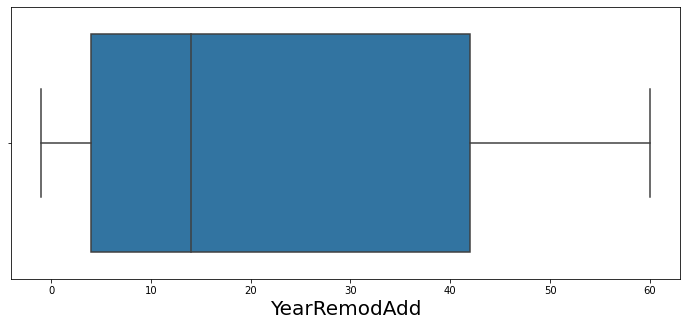

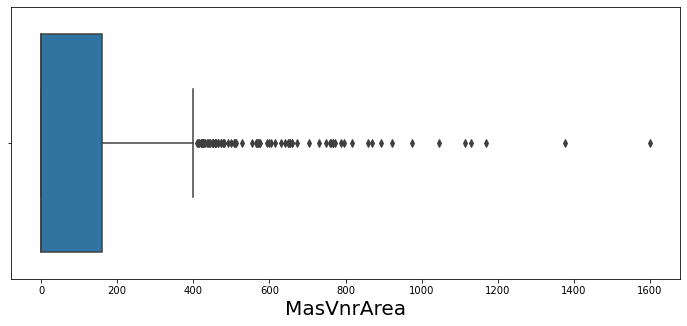

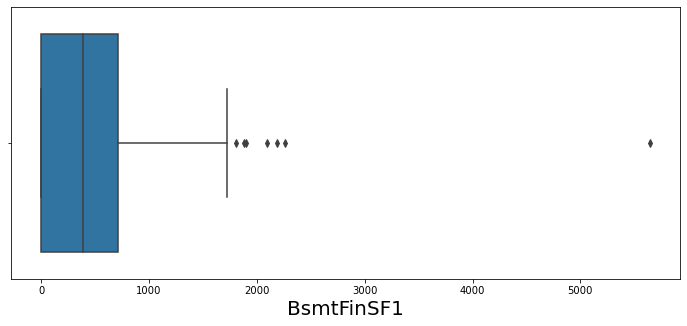

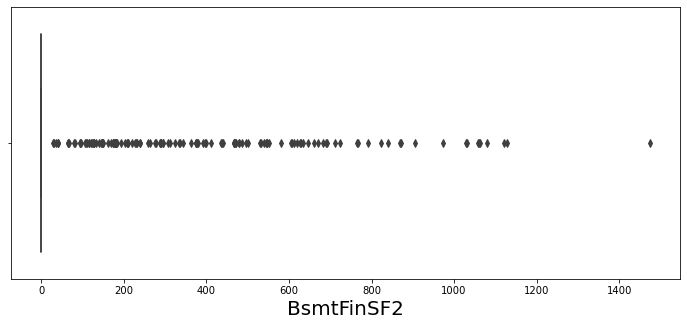

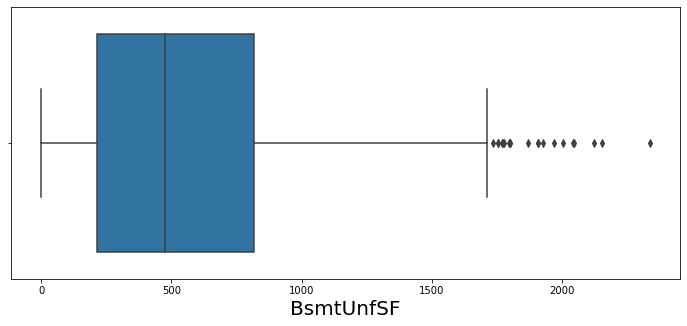

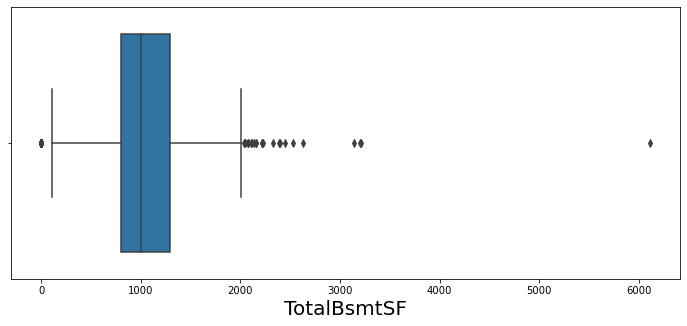

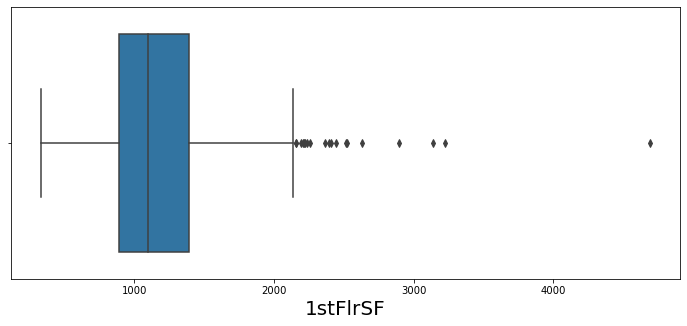

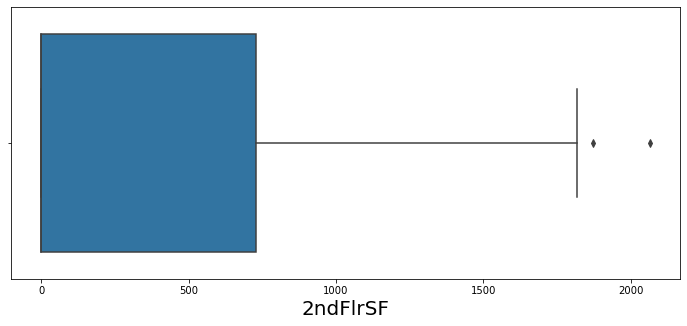

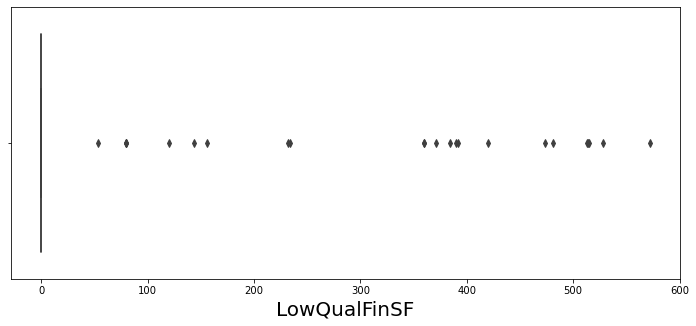

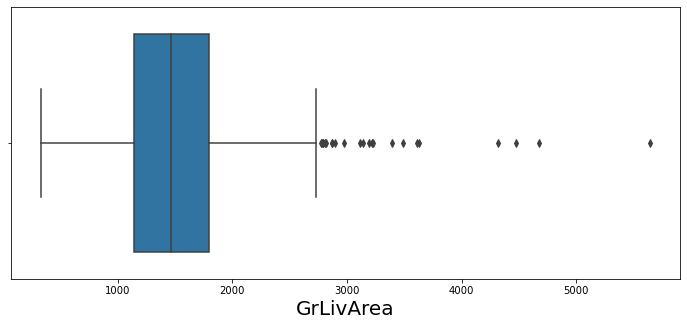

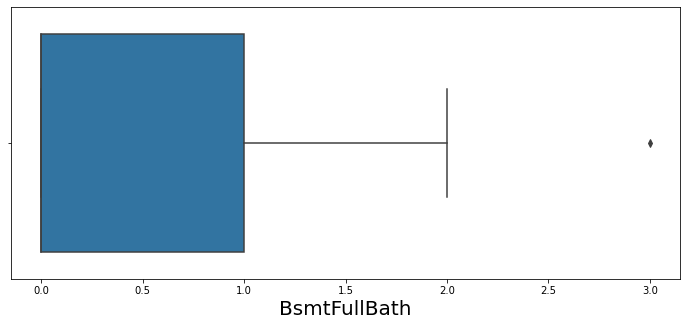

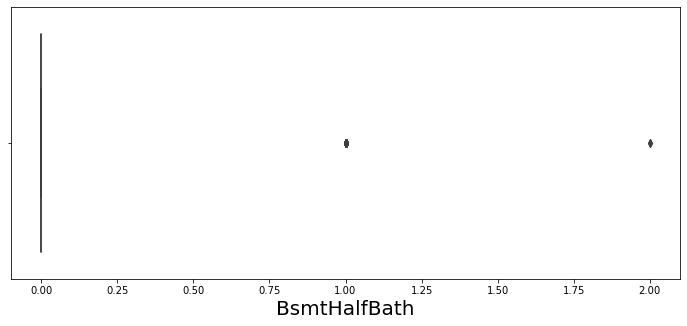

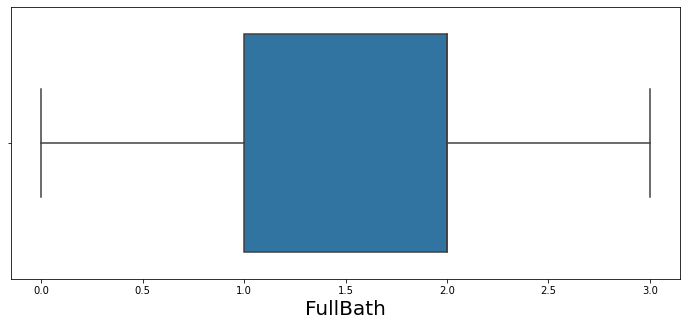

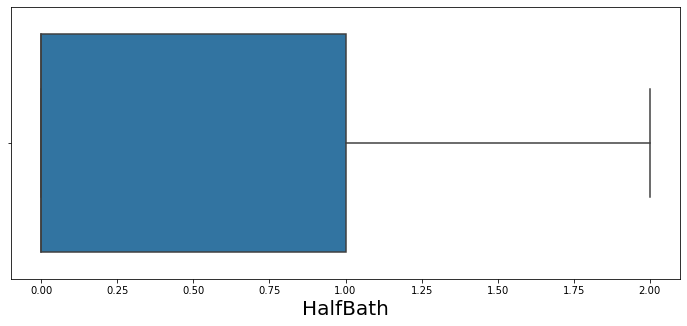

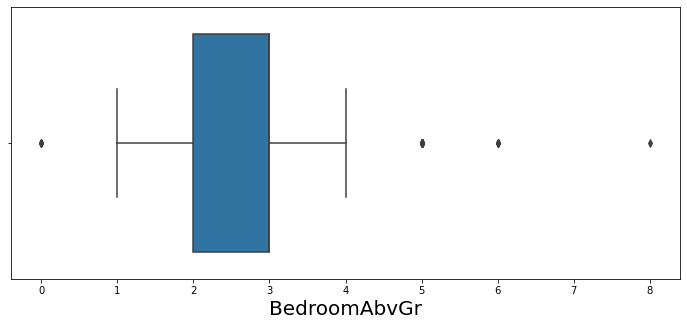

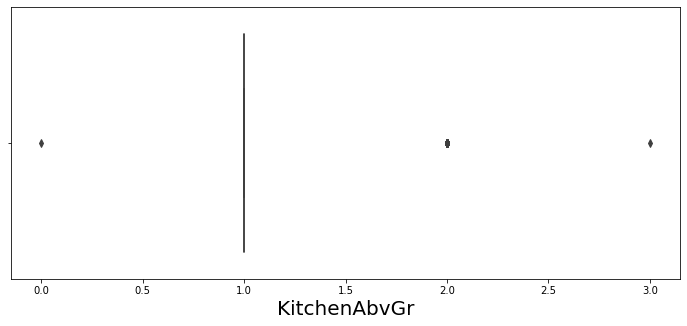

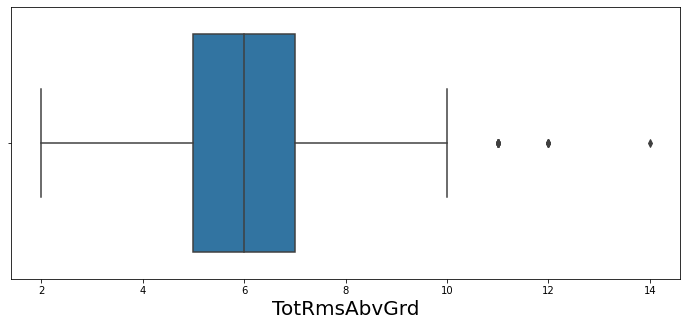

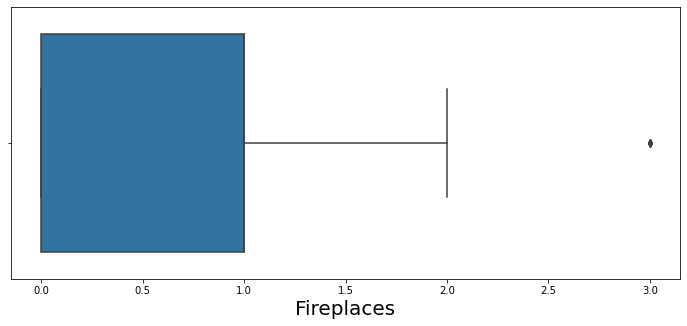

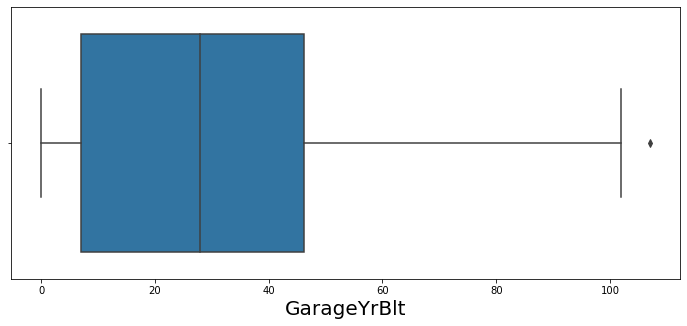

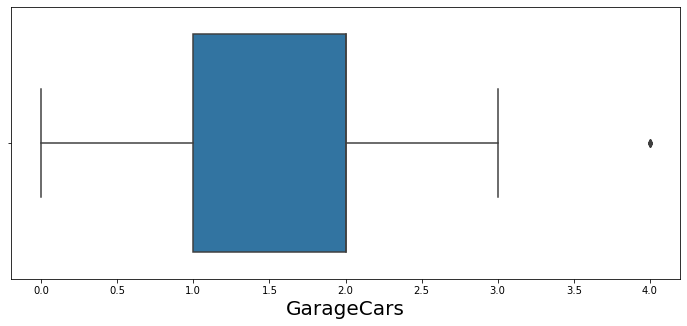

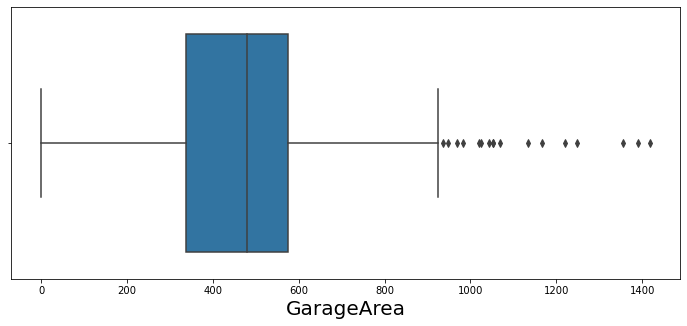

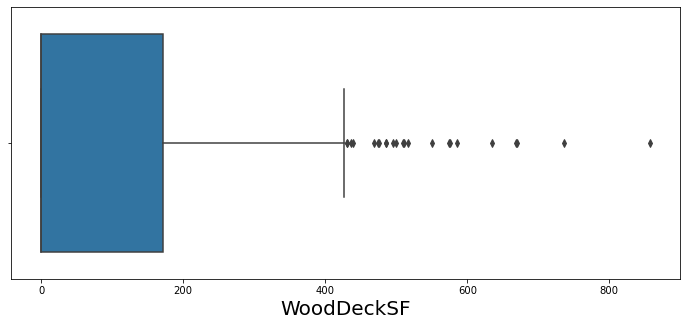

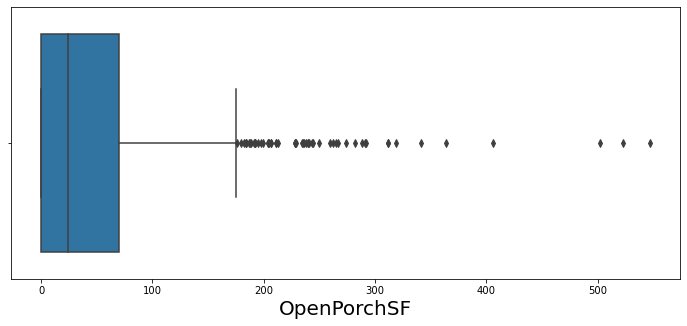

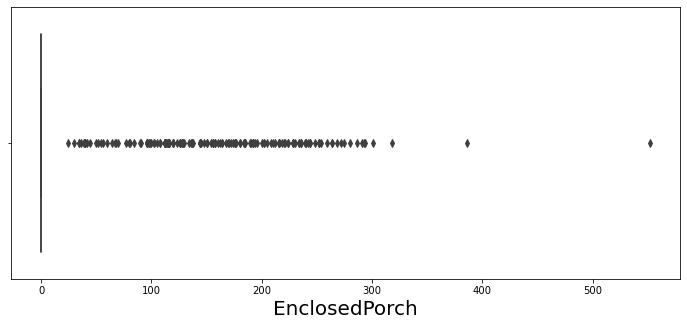

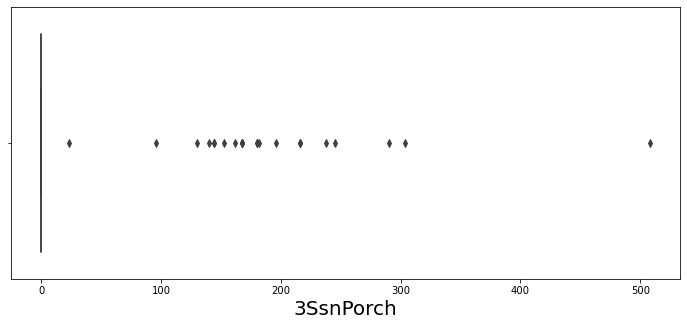

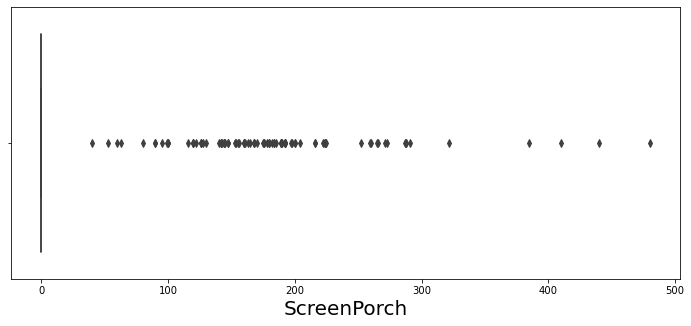

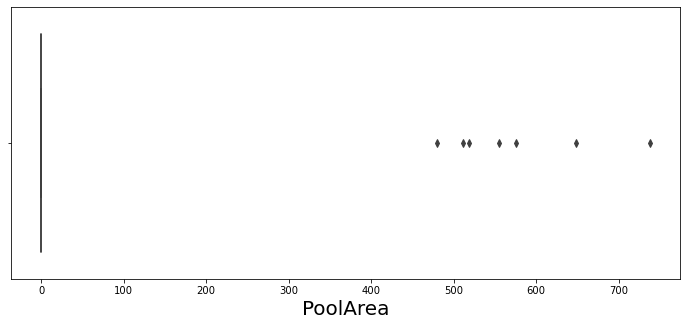

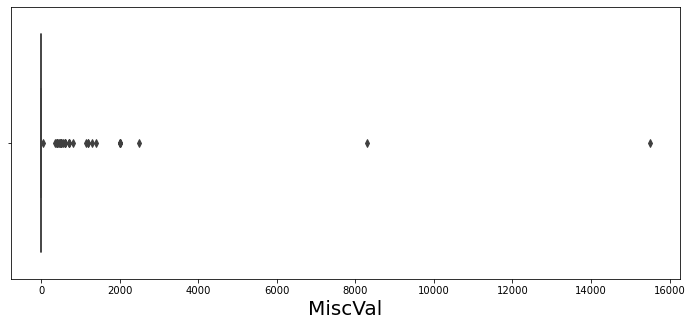

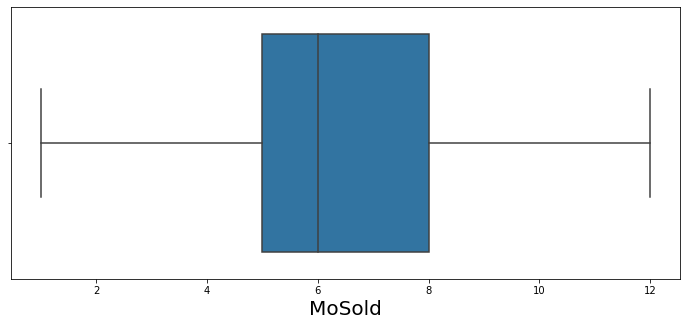

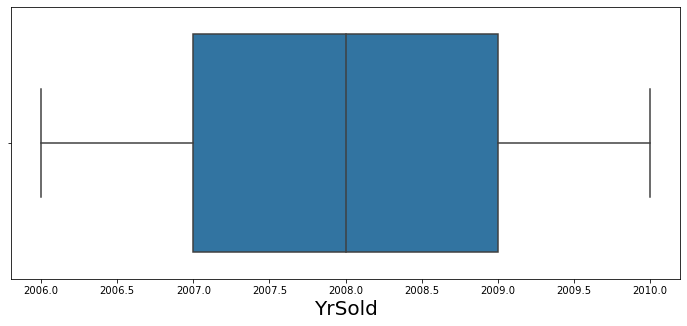

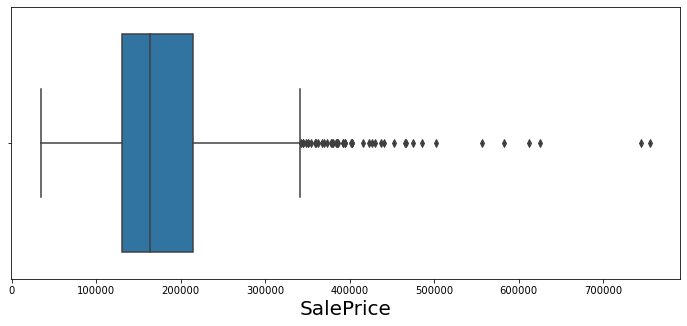

In [47]:
#To check the distribution of the outliers
for i in train_data.columns:
    if train_data.dtypes[i] !='object':
        plt.figure(figsize=[12,5])
        sns.boxplot(train_data[i])
        plt.xlabel(i,fontsize=20)
    plt.show()

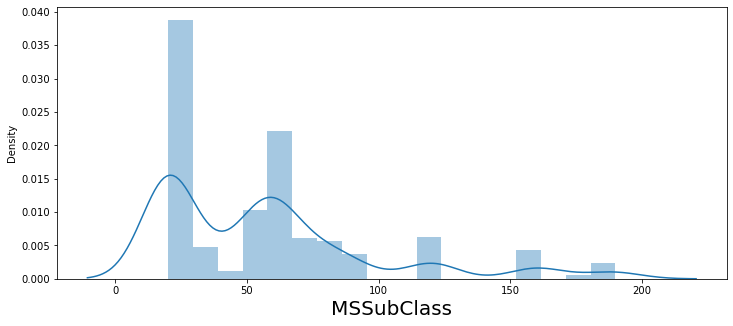

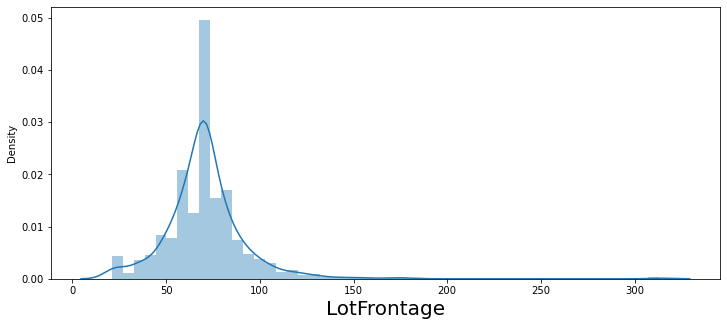

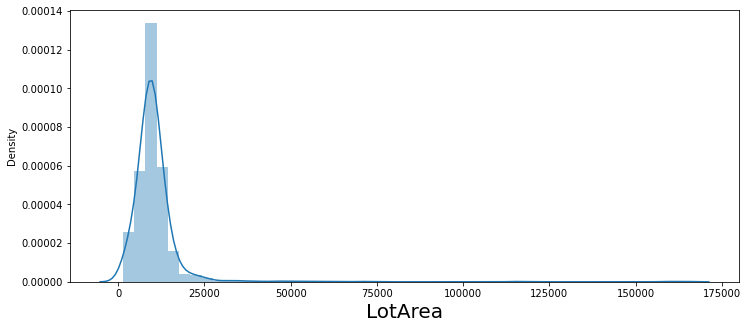

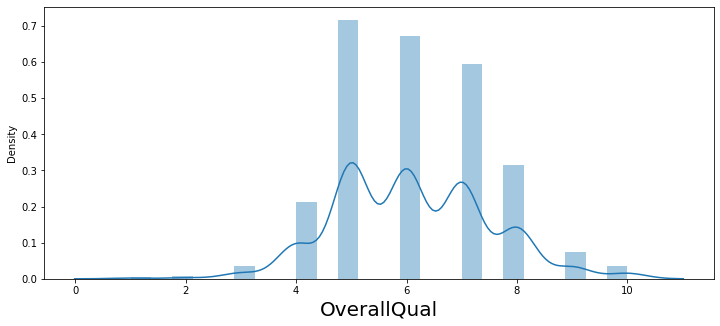

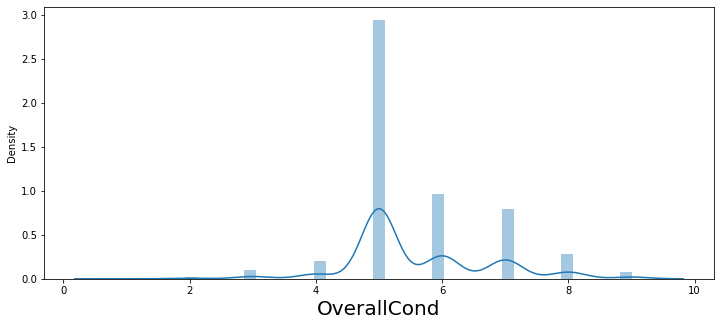

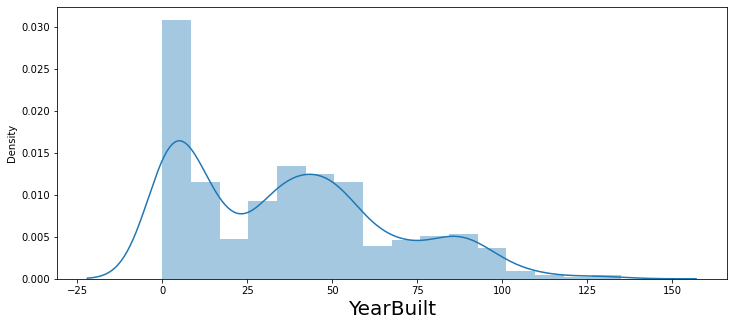

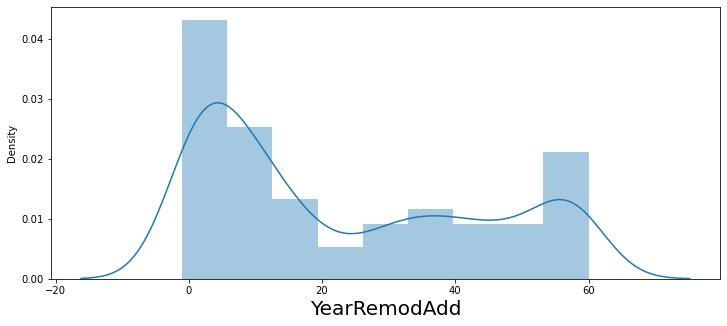

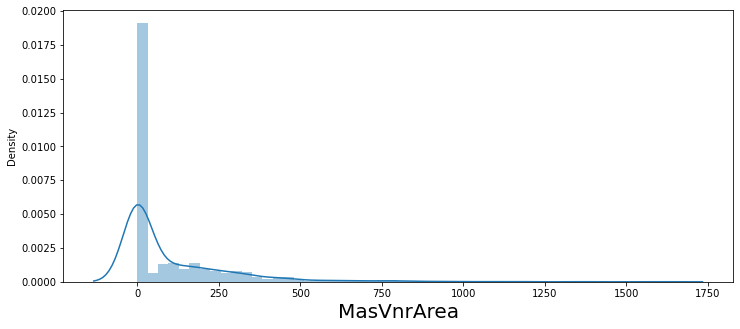

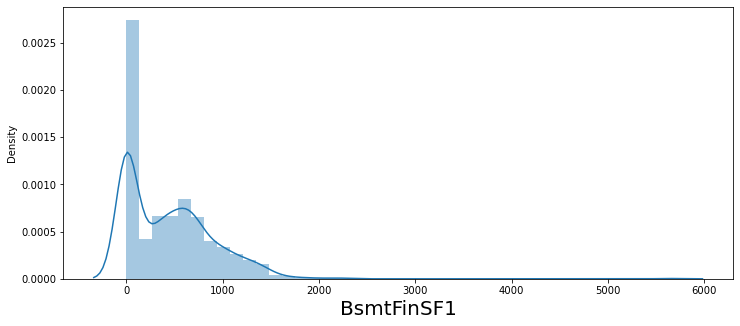

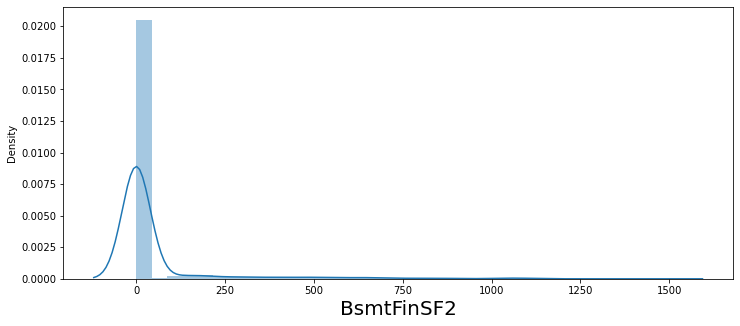

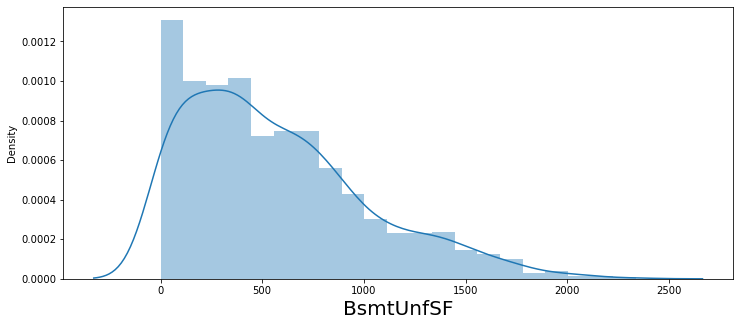

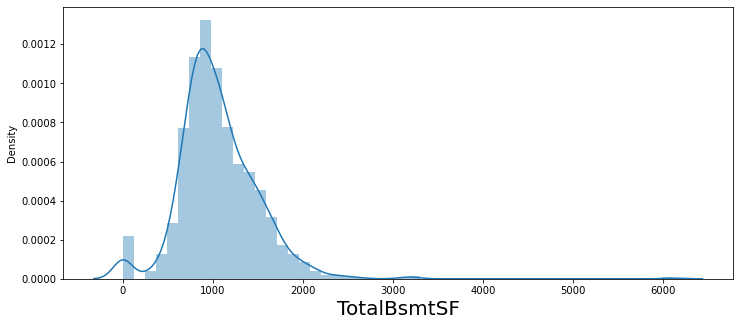

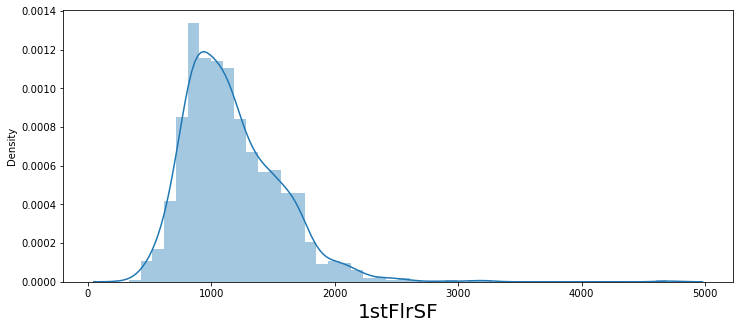

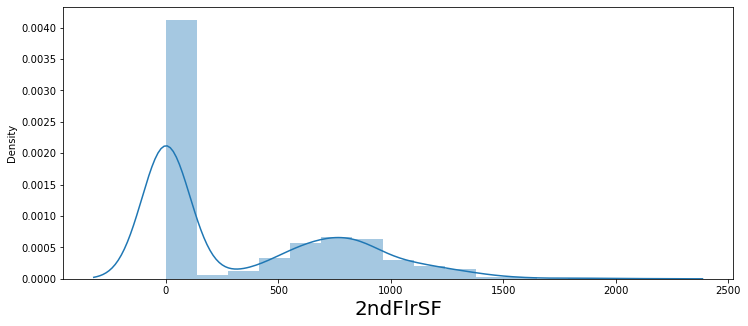

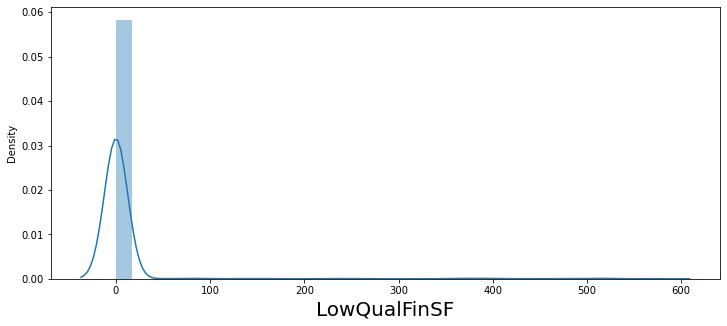

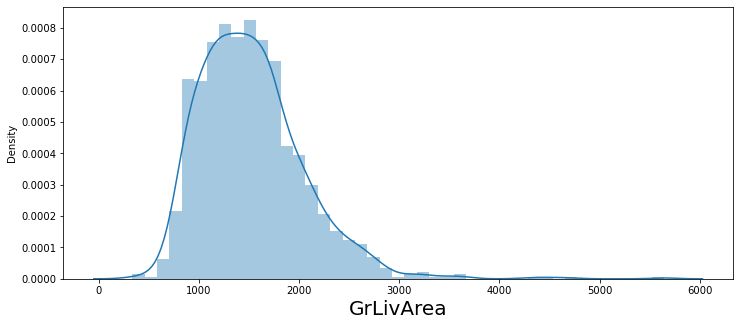

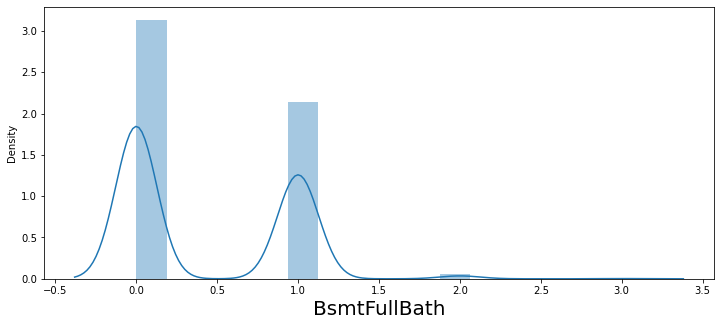

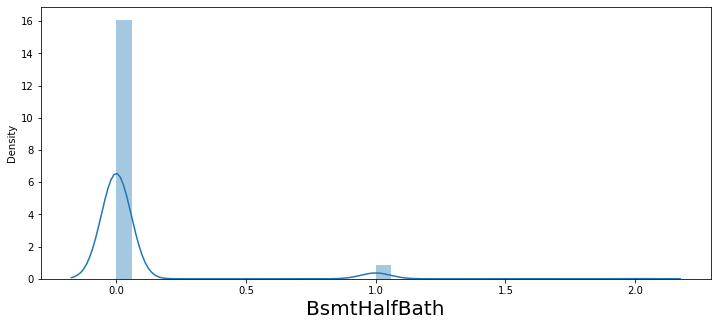

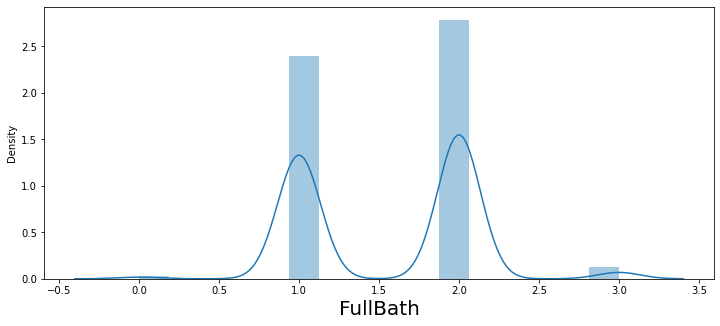

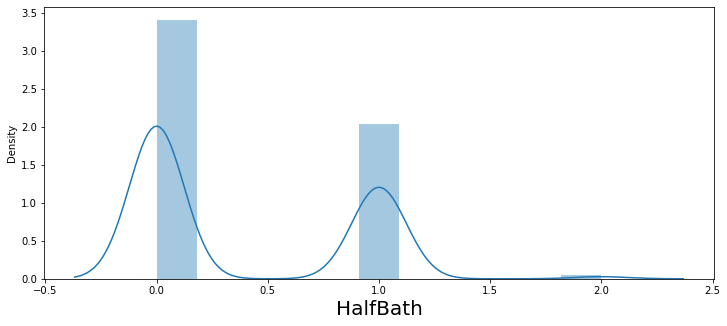

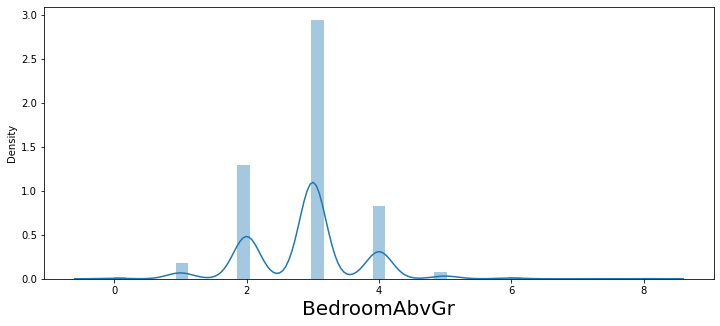

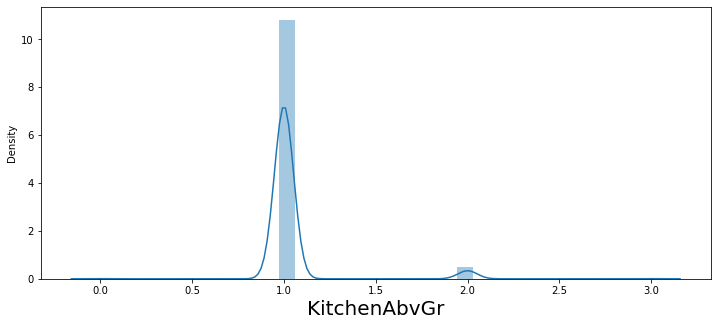

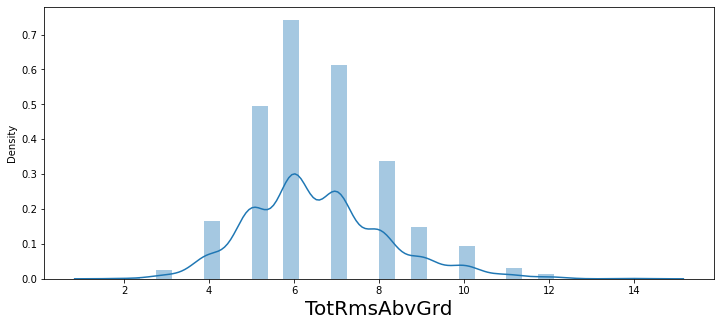

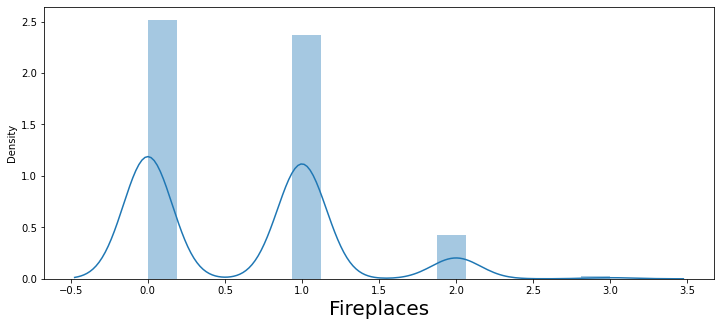

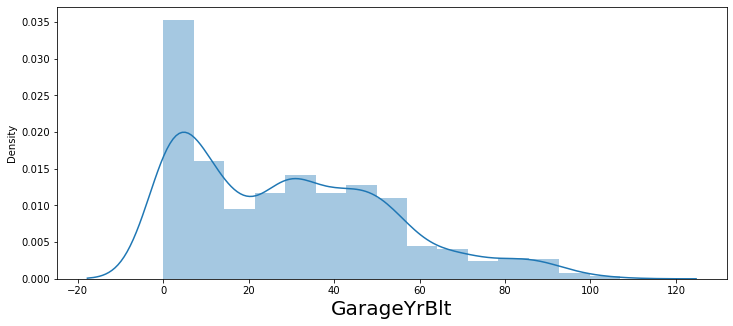

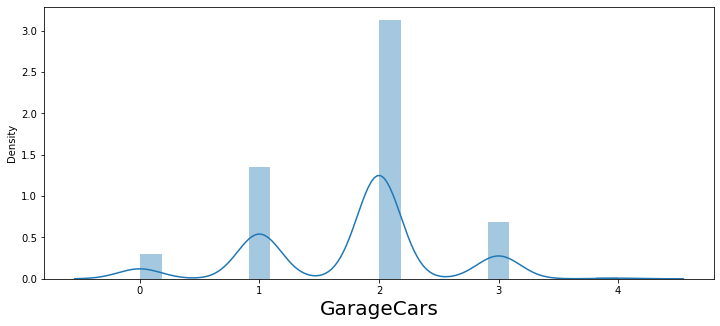

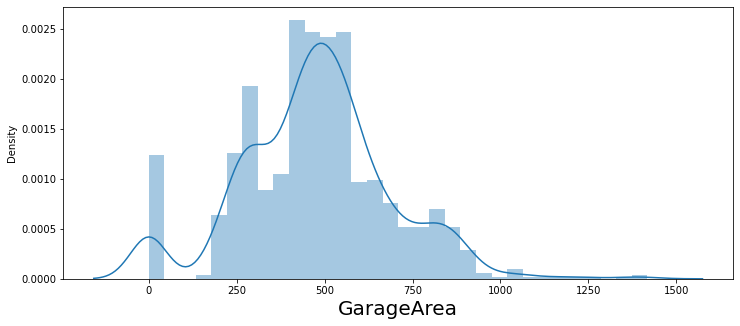

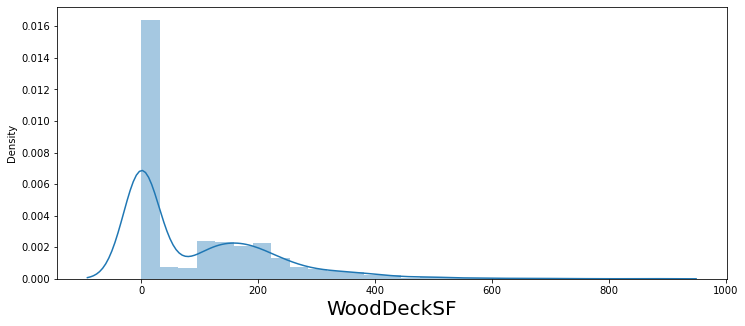

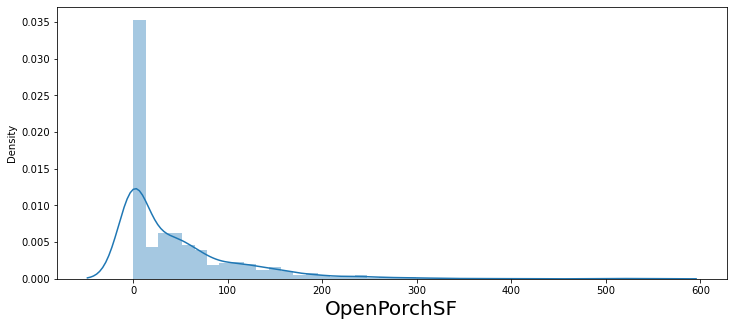

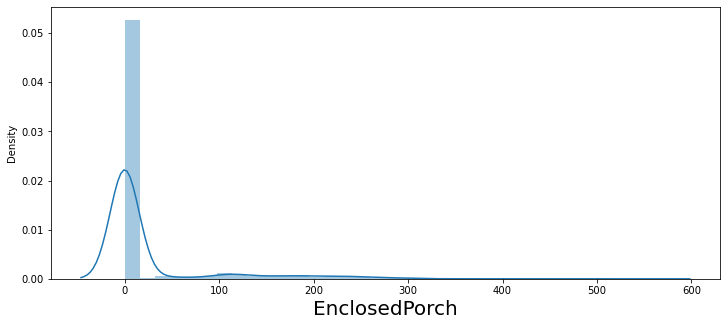

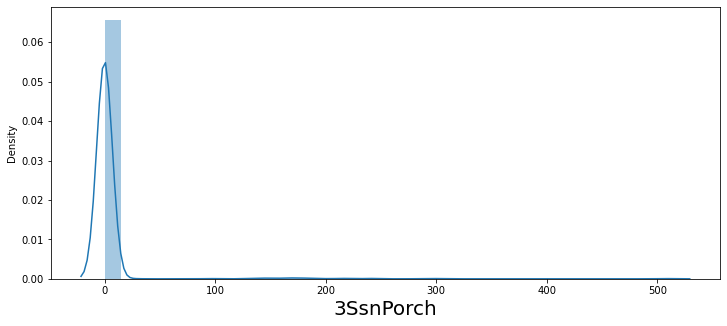

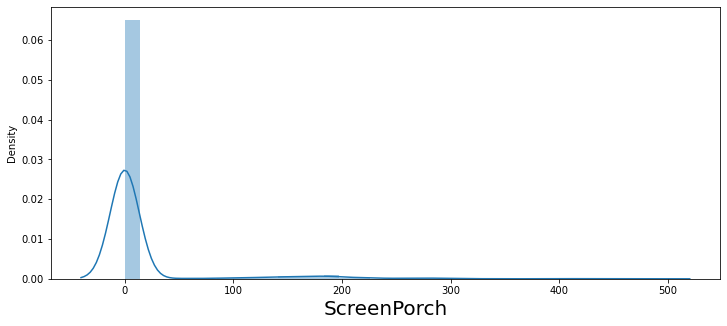

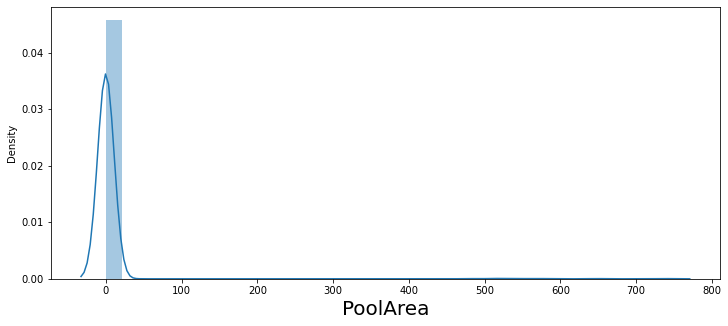

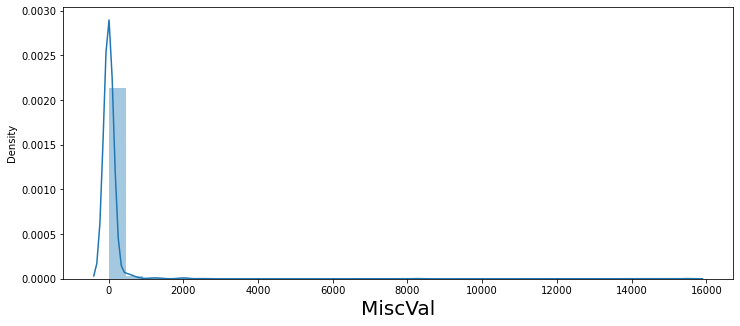

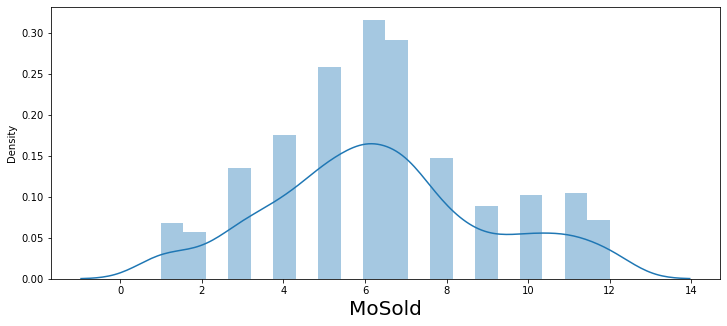

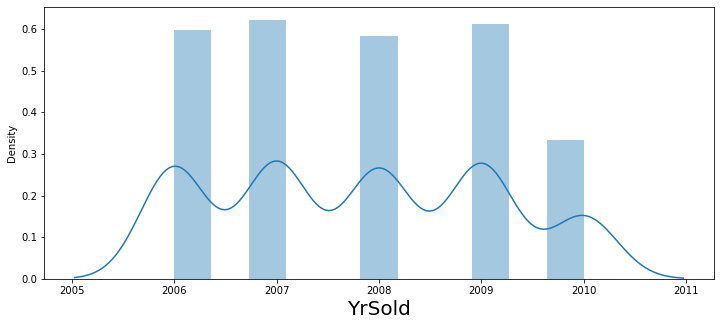

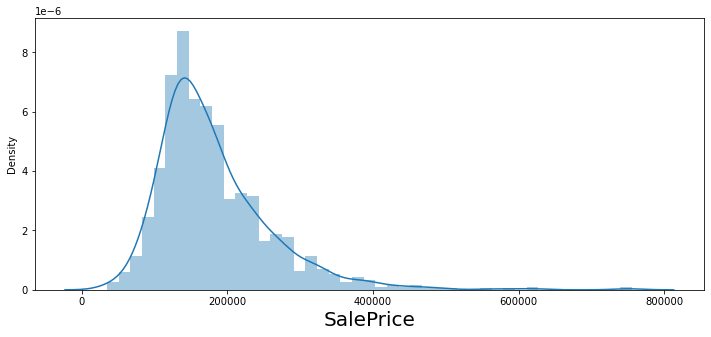

In [48]:
#To check the distribution of the outliers
for i in train_data.columns:
    if train_data.dtypes[i] !='object':
        plt.figure(figsize=[12,5])
        sns.distplot(train_data[i])
        plt.xlabel(i,fontsize=20)
    plt.show()

In [49]:
#Columns with outliers

features = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
'1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
'ScreenPorch','PoolArea','MiscVal']

### Applying zscore to remove the outliers

In [50]:
from scipy.stats import zscore  #importing zscore from library

z=np.abs(zscore(train_data[features]))
threshold = 3
data_new2 = train_data[(z<3).all(axis=1)]

In [58]:
data = data_new2.copy()  #let's make a copy of this data

## Removing Skewness

In [59]:
# Let's check for skewness
print(data[continuous_feature].skew())

LotFrontage      0.058600
LotArea          0.757749
MasVnrArea       1.668991
BsmtFinSF1       0.629592
BsmtFinSF2       4.408435
BsmtUnfSF        0.780676
TotalBsmtSF      0.016480
1stFlrSF         0.616069
2ndFlrSF         0.770503
GrLivArea        0.531456
GarageArea      -0.104518
WoodDeckSF       0.924729
OpenPorchSF      1.498602
EnclosedPorch    2.993791
ScreenPorch      4.698233
SalePrice        1.186546
dtype: float64


In [60]:
#Columns with skewed data
skewed_data = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
'1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
'ScreenPorch']

In [64]:
#Let's reduce the skewness by using the Powertransformation method

from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')


In [65]:
for i in skewed_data:
    data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))

    #data[i] = np.log1p(data[i])

In [66]:
print(data[continuous_feature].skew())

LotFrontage      0.058600
LotArea          0.099456
MasVnrArea       0.453894
BsmtFinSF1      -0.377223
BsmtFinSF2       3.100285
BsmtUnfSF       -0.285832
TotalBsmtSF      0.016480
1stFlrSF        -0.003542
2ndFlrSF         0.330029
GrLivArea       -0.006093
GarageArea      -0.104518
WoodDeckSF       0.064526
OpenPorchSF      0.032296
EnclosedPorch    2.432572
ScreenPorch      4.280073
SalePrice        1.186546
dtype: float64


### Encoding Categorical Data

In [68]:
#Let's check each categorical column and their unique values present in their independent column
for i in data.columns:
    if data.dtypes[i] =='object':
        print(i,'\n',data[i].unique(),'\n')

MSZoning 
 ['RL' 'RM' 'FV' 'RH' 'C (all)'] 

LotShape 
 ['IR1' 'Reg' 'IR2' 'IR3'] 

LandContour 
 ['Lvl' 'Bnk' 'HLS' 'Low'] 

LotConfig 
 ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3'] 

LandSlope 
 ['Gtl' 'Mod' 'Sev'] 

Neighborhood 
 ['NPkVill' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards' 'NAmes'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDale' 'StoneBr' 'BrkSide'
 'NridgHt' 'OldTown' 'Somerst' 'Timber' 'SWISU' 'SawyerW' 'ClearCr'
 'Veenker' 'Blmngtn' 'MeadowV' 'Blueste'] 

Condition1 
 ['Norm' 'Feedr' 'RRAn' 'PosA' 'Artery' 'PosN' 'RRNn' 'RRAe' 'RRNe'] 

Condition2 
 ['Norm' 'Feedr' 'RRAn'] 

BldgType 
 ['TwnhsE' '1Fam' 'Twnhs' 'Duplex' '2fmCon'] 

HouseStyle 
 ['1Story' '2Story' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Unf'] 

RoofStyle 
 ['Gable' 'Hip' 'Gambrel' 'Shed' 'Flat' 'Mansard'] 

RoofMatl 
 ['CompShg' 'WdShake' 'Roll' 'Tar&Grv' 'WdShngl'] 

Exterior1st 
 ['Plywood' 'MetalSd' 'CemntBd' 'VinylSd' 'Wd Sdng' 'HdBoard' 'Stucco'
 'WdShing' 'BrkFace' 'AsbShng' 'AsphShn' 'ImStucc' 'Br

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for i in data.columns:
    if data.dtypes[i] =='object':
        data[i]=le.fit_transform(data[i])

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 1167
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     912 non-null    int64  
 1   MSZoning       912 non-null    int32  
 2   LotFrontage    912 non-null    float64
 3   LotArea        912 non-null    float64
 4   LotShape       912 non-null    int32  
 5   LandContour    912 non-null    int32  
 6   LotConfig      912 non-null    int32  
 7   LandSlope      912 non-null    int32  
 8   Neighborhood   912 non-null    int32  
 9   Condition1     912 non-null    int32  
 10  Condition2     912 non-null    int32  
 11  BldgType       912 non-null    int32  
 12  HouseStyle     912 non-null    int32  
 13  OverallQual    912 non-null    int64  
 14  OverallCond    912 non-null    int64  
 15  YearBuilt      912 non-null    int64  
 16  YearRemodAdd   912 non-null    int64  
 17  RoofStyle      912 non-null    int32  
 18  RoofMatl 

- No more Categorical data are present in our dataset

In [79]:
data.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
0         120         3         70.0 -1.244596         0            3   
2          60         3         92.0  0.239150         0            3   
3          20         3        105.0  0.719643         0            3   
4          20         3         70.0  1.900363         0            3   
5          60         3         58.0  1.292228         0            3   

   LotConfig  LandSlope  Neighborhood  Condition1  ...  EnclosedPorch  \
0          4          0            13           2  ...      -0.358766   
2          1          0            15           2  ...      -0.358766   
3          4          0            14           2  ...      -0.358766   
4          2          0            14           2  ...      -0.358766   
5          4          0             8           2  ...      -0.358766   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0    -0.222446         0        0       2    2007         8   
2          0    -0.222446         0        0       6    2007         8   
3          0    -0.222446         0        0       1    2010         0   
4          0    -0.222446         0        0       6    2009         8   
5          0    -0.222446         0        0      11    2006         6   

   SaleCondition  SalePrice  
0              4     128000  
2              4     269790  
3              4     190000  
4              4     215000  
5              5     219210  

[5 rows x 74 columns]

### Splitting features and labels

In [81]:
X = data.drop(columns = 'SalePrice') #Features
Y = data['SalePrice'] #Label

### Scaling the data

In [82]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

## Finding Best Random State

In [83]:
from sklearn.linear_model import LinearRegression

maxR2_Score = 0
maxRS = 0

for i in range(150):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.9183775626341516  with Random State  32


## Splitting Train Test data

In [170]:
#TrainTestSplit
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = maxRS)

In [86]:
x=x_train.copy()
from sklearn.decomposition import PCA 
for i in range(30,72):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

30  variance :0.7763313422200341
31  variance :0.787246584627239
32  variance :0.7974840950602764
33  variance :0.8074060670749652
34  variance :0.8179312530328002
35  variance :0.827417197530154
36  variance :0.8368946632489256
37  variance :0.8459306836224406
38  variance :0.8549507804323333
39  variance :0.8634622659043494
40  variance :0.8715085875562467
41  variance :0.8794135865072613
42  variance :0.8869739517333577
43  variance :0.8944952272819228
44  variance :0.9013965933113914
45  variance :0.9082912926855713
46  variance :0.9147897319862867
47  variance :0.92116120462622
48  variance :0.9272761083894999
49  variance :0.9332114968324023
50  variance :0.9387104119481265
51  variance :0.9441134637708268
52  variance :0.9493104853130729
53  variance :0.95433967509298
54  variance :0.9588955909700038
55  variance :0.9630926533179466
56  variance :0.9672200753826291
57  variance :0.971130094859056
58  variance :0.9748982011960169
59  variance :0.9784550058606375
60  variance :0.9

In [88]:
pca = PCA(n_components=70)
x=pca.fit_transform(x)
x_t=_test.copy()
x_t=pca.fit_transform(x_t)

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
parameters={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf=RandomForestRegressor()
rand = RandomizedSearchCV(estimator = rf, param_distributions = parameters, 
                          n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='r2')
rand.fit(x,y_train)
rand.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [115]:
random=RandomForestRegressor(n_estimators =600,
                         min_samples_split= 10,
                         min_samples_leaf= 1,
                         max_features= 'auto',
                         max_depth= None,
                         bootstrap= True)

In [116]:

random.fit(x,y_train)
y_pred_r = random.predict(x_t)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred_r)))
print("r2_score is: ",r2_score(y_test,y_pred_r))

RMSE is:  24487.27545414719
r2_score is:  0.8616824329779895


In [117]:
cols = {}
for feature, importance in zip(data.columns, random.feature_importances_):
    cols[feature] = importance
    
importances = pd.DataFrame.from_dict(cols, orient='index').rename(columns={0: 'Gini-Importance'}).head(10)
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})

In [137]:
importances

Features  Gini-Importance
0    MSSubClass         0.836774
1   LandContour         0.015381
2   LotFrontage         0.009862
3     LotConfig         0.006999
4       LotArea         0.006180
5      LotShape         0.003469
6    Condition1         0.002962
7  Neighborhood         0.002525
8      MSZoning         0.002355
9     LandSlope         0.001355

## Linear Regression with RFE

- Lasso 
- Ridge

In [171]:
# Eliminate features at a step 0.05*n_featurees
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
def feature_RFE(model,train_data,y_data):
    support = []
    n_features = []
    scores = []
    rfecv = RFECV(estimator=model, step=0.05, cv=KFold(5,random_state=0,shuffle=True))
    rfecv.fit(train_data, y_train)
    return rfecv

In [172]:
# Now we run RFE for linear regression
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()
rfe_cv = feature_RFE(lm,x_train,y_train)

In [173]:
print("Optimal RFE number of features : %d" % rfe_cv.n_features_)
print("Feature Ranking: ")
print(rfe_cv.ranking_)

Optimal RFE number of features : 25
Feature Ranking: 
[ 1 17  2  1 12 12 16 15  7 16 15  5  6  1  1  1 11 13  3  1 13  3 17  1
  9  3  1 12  8 16  1 10  8  1  1  4  1 11 15  2  2 14  1  6  6  5  4  1
  1  1  1  1  1  1  1 14  1 14  1 11  7 10  1  5  8  9  9 17 13  4 10  7
  1]


In [174]:
from sklearn.feature_selection import RFE
lm.fit(x_train,y_train)
rfe = RFE(lm,49)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=49)

In [176]:
x_train = pd.DataFrame(x_train)
rfe_scores = pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [180]:
X_train_lm = x_train[rfe_sel_columns]
X_test_lm = x_test[rfe_sel_columns]

In [181]:
X_train_lm.shape

(729, 49)

## Ridge Model

In [183]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_lm,y_train)

y_pred_ridge = ridge.predict(X_test_lm)

In [184]:
 
print('R Squared (R2): ',r2_score(y_test, y_pred_ridge))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_ridge))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_ridge))

R Squared (R2):  0.9184558353207435
Mean Squared Error (MSE):  353505748.35825616
Root Mean Squared Error (RMSE):  18801.74854523526
Mean Absolute Error (MAE):  14673.380514269958


### Lasso Model

In [186]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_lm,y_train)

y_pred_Lasso = lasso.predict(x_test)

In [187]:

print('R Squared (R2): ',r2_score(y_test, y_pred_Lasso))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_pred_Lasso))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_pred_Lasso)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_pred_Lasso))

R Squared (R2):  0.9184024790126311
Mean Squared Error (MSE):  353737055.6713309
Root Mean Squared Error (RMSE):  18807.898757472376
Mean Absolute Error (MAE):  14678.455286542874


    Hence, Our best model is 'Ridge'
    And let's proceed further with hyper parameter tuning for our Best Model(Ridge)

## Hyper Tuning

#### Ridge regression model with Grid search CV

In [201]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.metrics import r2_score

folds = KFold(n_splits=10,shuffle=True,random_state=32)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0],'fit_intercept':[True],'random_state':range(1,10),
              'max_iter':[10,100,1000],'copy_X':[True],'solver':['auto','svd', 'sag','saga']}



model_cv = GridSearchCV(estimator = ridge,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )


In [202]:
model_cv.fit(X_train_lm,y_train)

Fitting 10 folds for each of 756 candidates, totalling 7560 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=32, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [10, 100, 1000],
                         'random_state': range(1, 10),
                         'solver': ['auto', 'svd', 'sag', 'saga']},
             return_train_score=True, scoring='r2', verbose=1)

In [212]:
model_cv.best_params_

{'alpha': 20.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 10,
 'random_state': 4,
 'solver': 'sag'}

In [213]:
ridge_final = Ridge(alpha=20,copy_X=True,fit_intercept=True,max_iter=10,random_state=1,solver='sag')
ridge_final.fit(X_train_lm,y_train)

y_test_pred = ridge_final.predict(X_test_lm)

print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9189597922811923


In [222]:

print('R Squared (R2): ',r2_score(y_test, y_test_pred))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,y_test_pred))

R Squared (R2):  0.9189597922811923
Mean Squared Error (MSE):  351321022.0428347
Root Mean Squared Error (RMSE):  18743.55948166822
Mean Absolute Error (MAE):  14734.615864227475


## Saving the Model

In [223]:
import joblib
joblib.dump(ridge_final,'House_Price_Prediction.pkl')

['House_Price_Prediction.pkl']

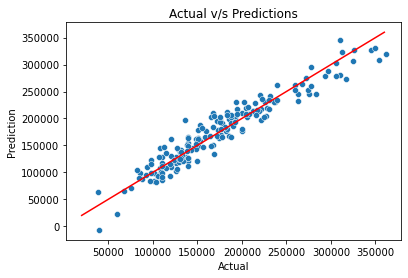

In [231]:
# plot LOO predictions against actual
plot_LOO = sns.scatterplot(y_test, y_test_pred)
plot_LOO.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(20000,360000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.title("Actual v/s Predictions")
plt.show()


--------

# TEST DATA PREDICTIONS

In [315]:
test_data = pd.read_csv(r'C:\Users\91977\DataScienceProjects\Project-Housing_splitted\test.csv')

In [316]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [317]:
test_data.shape

(292, 80)

In [318]:
test_data.nunique()  # check the no. of unique values in dataset


Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath 

In [319]:
#"Id" contains full unique data in each row, hence it doesn't contribute to predict the Sale Price. Let's remove thsi column
test_data.drop(columns = 'Id',inplace=True)  #to remove ID column

In [320]:
# imputing  Nan values with No Garage for GarageType,GarageFinish,GarageQual,GarageCond
missingGarage=['GarageType','GarageFinish','GarageQual','GarageCond']

for i in missingGarage:
    test_data[i] = test_data[i].replace(np.nan, 'No Garage')
    print(test_data[i].value_counts())
    print('-'*30)


Attchd       179
Detchd        73
BuiltIn       18
No Garage     17
Basment        3
CarPort        1
2Types         1
Name: GarageType, dtype: int64
------------------------------
Unf          118
RFn           83
Fin           74
No Garage     17
Name: GarageFinish, dtype: int64
------------------------------
TA           261
No Garage     17
Fa             9
Gd             3
Ex             1
Po             1
Name: GarageQual, dtype: int64
------------------------------
TA           265
No Garage     17
Fa             7
Ex             1
Po             1
Gd             1
Name: GarageCond, dtype: int64
------------------------------


In [321]:
    
features_nan=[feature for feature in test_data.columns if test_data[feature].isnull().sum()>=1 and test_data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(test_data[feature].isnull().mean(),4)))


Alley: 0.9521% missing values
MasVnrType: 0.0034% missing values
BsmtQual: 0.024% missing values
BsmtCond: 0.024% missing values
BsmtExposure: 0.024% missing values
BsmtFinType1: 0.024% missing values
BsmtFinType2: 0.024% missing values
Electrical: 0.0034% missing values
FireplaceQu: 0.476% missing values
Fence: 0.8493% missing values
MiscFeature: 0.9658% missing values


In [322]:

    
# list of numerical variables
numerical_features = [i for i in test_data.columns if test_data[i].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
test_data[numerical_features].head()


Number of numerical variables:  37


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          20         86.0    14157            9            5       2005   
1         120          NaN     5814            8            5       1984   
2          20          NaN    11838            8            5       2001   
3          70         75.0    12000            7            7       1941   
4          60         86.0    14598            6            5       2007   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2006       200.0        1249           0  ...         178   
1          1984         0.0        1036           0  ...          63   
2          2001         0.0           0           0  ...         202   
3          1950         0.0         275           0  ...           0   
4          2007        74.0           0           0  ...         100   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0           51              0          0            0         0     NaN   
1            0              0          0            0         0     NaN   
2          151              0          0            0         0     NaN   
3            0              0          0            0         0     NaN   
4           18              0          0            0         0     NaN   

   MiscVal  MoSold  YrSold  
0        0       7    2007  
1        0       8    2009  
2        0       6    2009  
3        0       7    2009  
4        0       1    2008  

[5 rows x 37 columns]

In [323]:

def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('None')
    return data


In [324]:
test_data=replace_cat_feature(test_data,features_nan)


In [325]:
test_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL         86.0    14157   Pave  None      IR1   
1         120       RL          NaN     5814   Pave  None      IR1   
2          20       RL          NaN    11838   Pave  None      Reg   
3          70       RL         75.0    12000   Pave  None      Reg   
4          60       RL         86.0    14598   Pave  None      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC Fence  \
0         HLS    AllPub    Corner  ...           0        0    NaN  None   
1         Lvl    AllPub   CulDSac  ...           0        0    NaN  None   
2         Lvl    AllPub    Inside  ...           0        0    NaN  None   
3         Bnk    AllPub    Inside  ...           0        0    NaN  None   
4         Lvl    AllPub   CulDSac  ...           0        0    NaN  None   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0        None       0       7    2007        WD         Normal  
1        None       0       8    2009       COD        Abnorml  
2        None       0       6    2009        WD         Normal  
3        None       0       7    2009        WD         Normal  
4        None       0       1    2008        WD         Normal  

[5 rows x 79 columns]

In [326]:


# identified features with Year using key words 'year' or 'yr' in column headers
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]


# Let's see the scatterplot between All years features with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=test_data.copy()
        # Capturing the difference between year variable and year the house was sold
        test_data[feature]=test_data['YrSold']-test_data[feature]
        
  

In [356]:
      
        
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count",len(continuous_feature))

continuous_feature

Continuous feature Count 15


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [335]:
numerical_with_nan=[feature for feature in test_data.columns if test_data[feature].isnull().sum()>=1 and test_data[feature].dtypes!='O']


# Replacing by using median since there are outliers
for feature in numerical_with_nan:
    median_value=test_data[feature].median()
    test_data[feature].fillna(median_value,inplace=True)

In [329]:
# Now, as there were some features(Temporal) which contained year values,let's change them to difference from year of Sale
years=['YearBuilt','YearRemodAdd','GarageYrBlt']
for feature in years:
    test_data[feature]=test_data['YrSold']-test_data[feature]
    


In [330]:
#dropping the columns as done earlier

test_data = test_data.drop(columns = ['Alley','MiscFeature','PoolQC','Fence'])


test_data = test_data.drop(['Utilities','Street'], axis = 'columns')  #drop columns: "Utilities" and "Street"

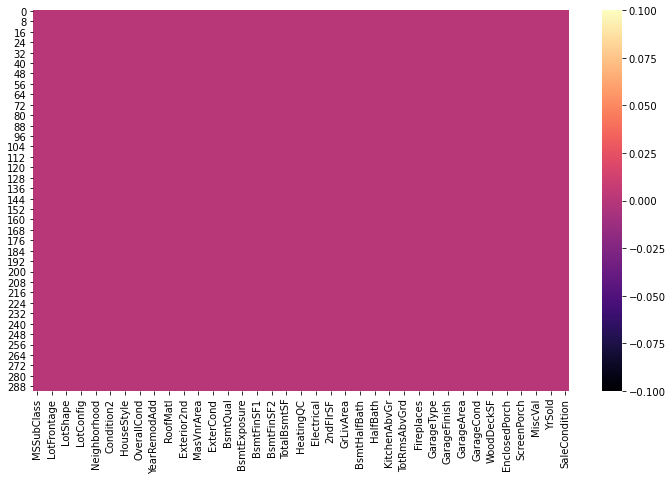

In [336]:
#Plot null values to check if any

plt.figure(figsize=(12,7))
sns.heatmap(test_data.isna(),cmap='magma')
plt.show()

 NO MORE NULL VALUES PRESENT

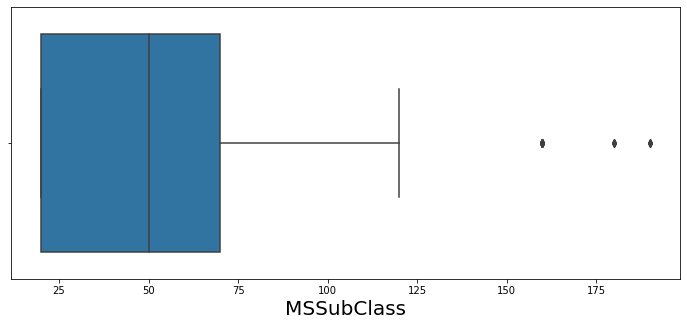

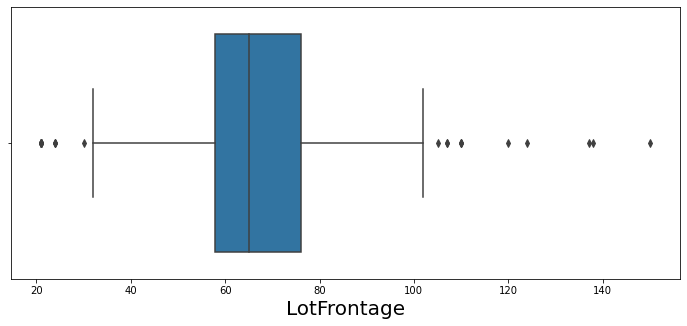

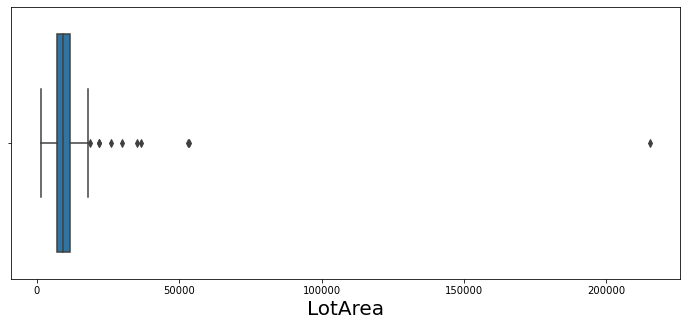

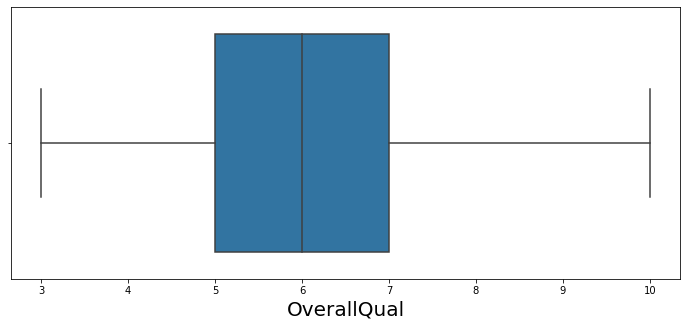

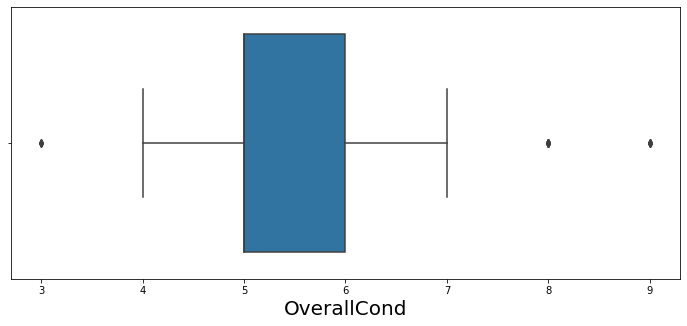

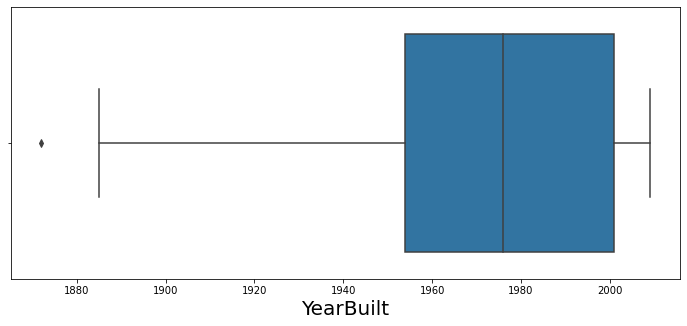

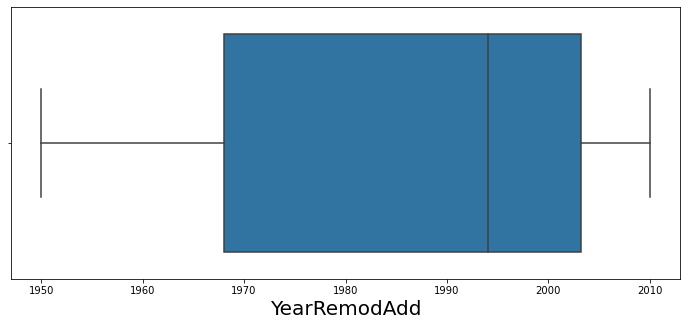

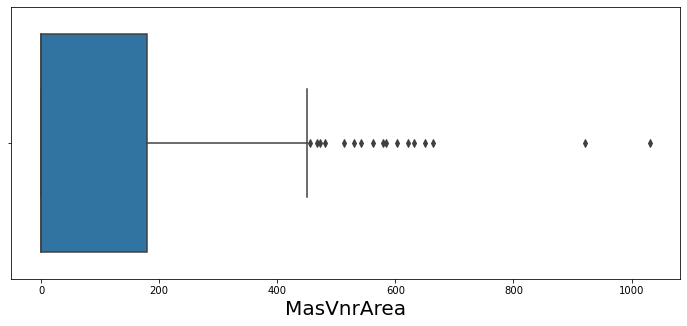

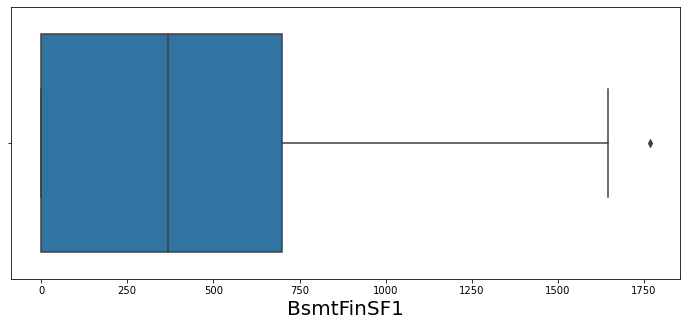

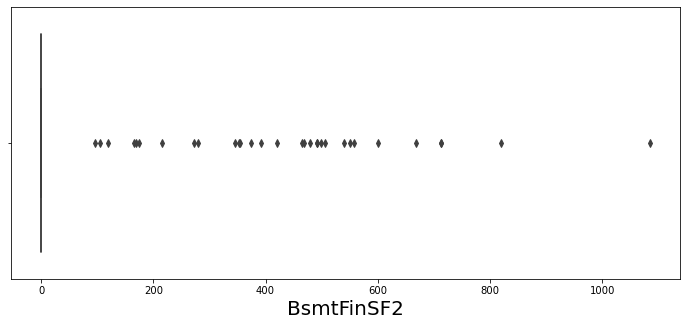

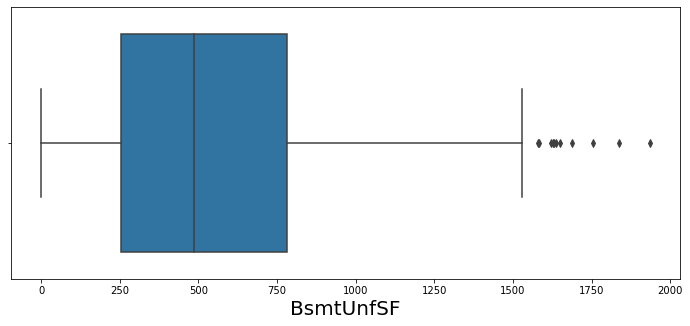

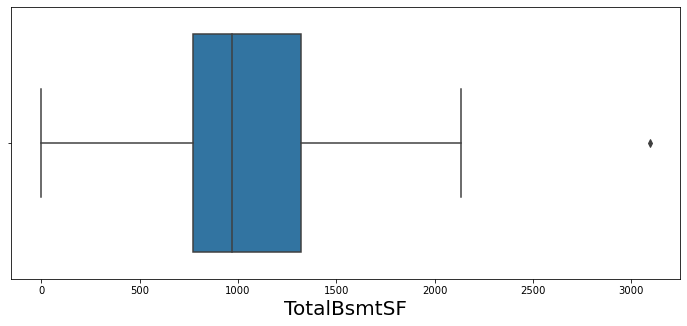

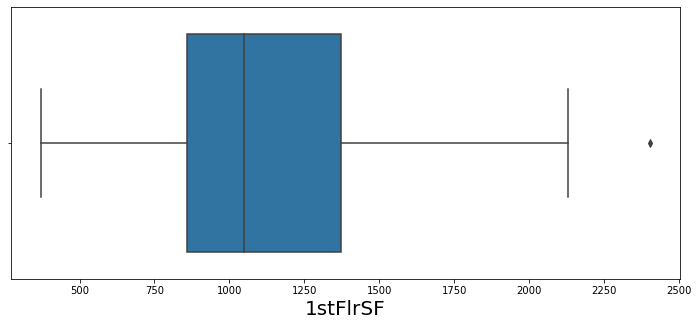

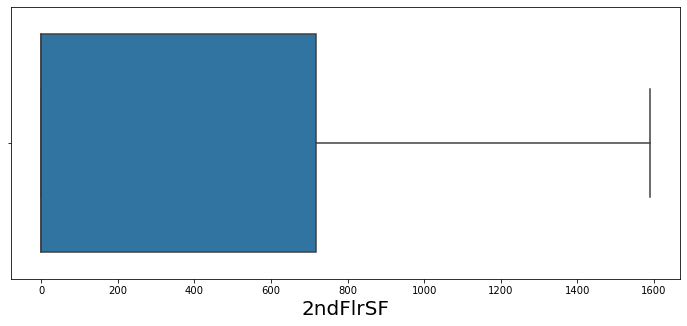

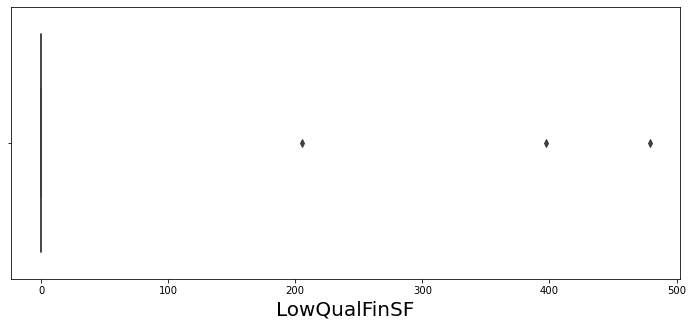

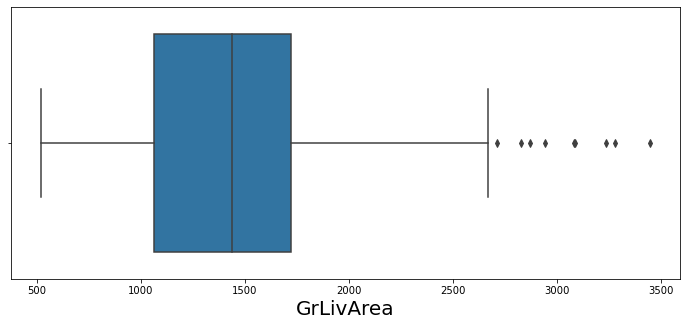

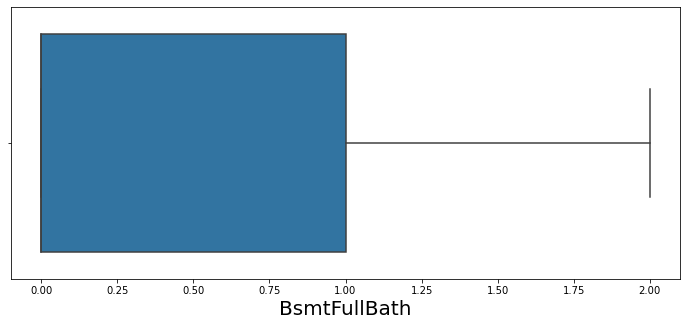

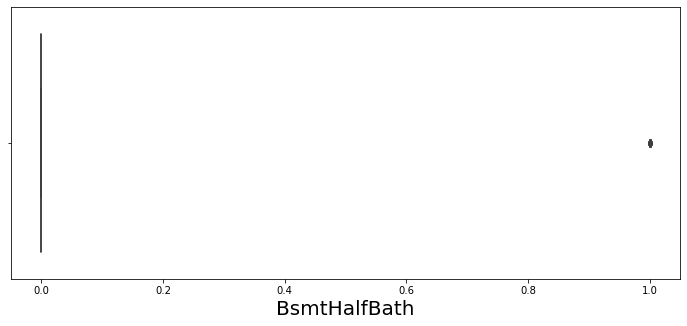

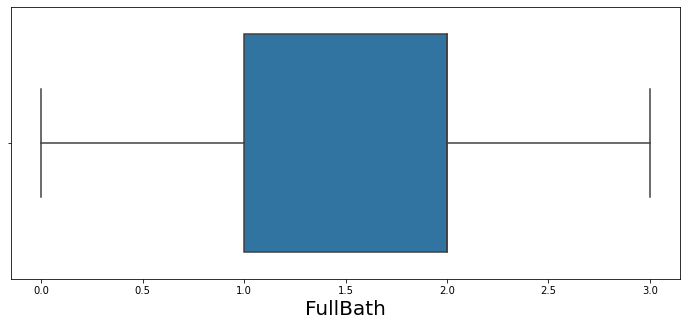

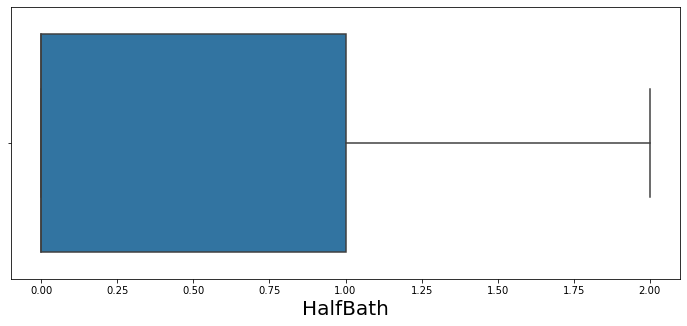

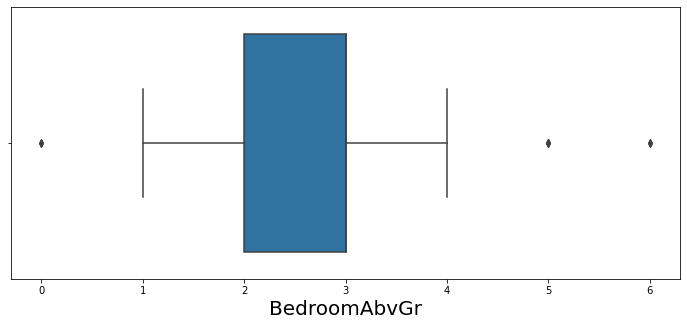

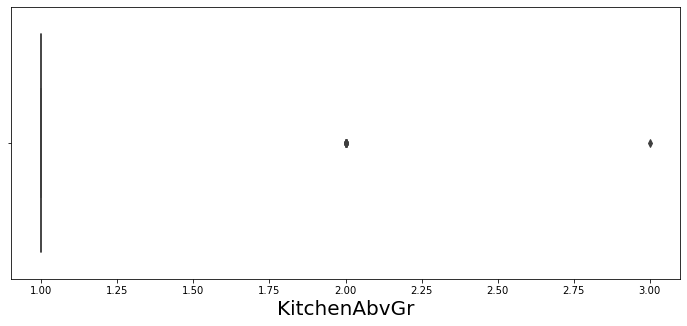

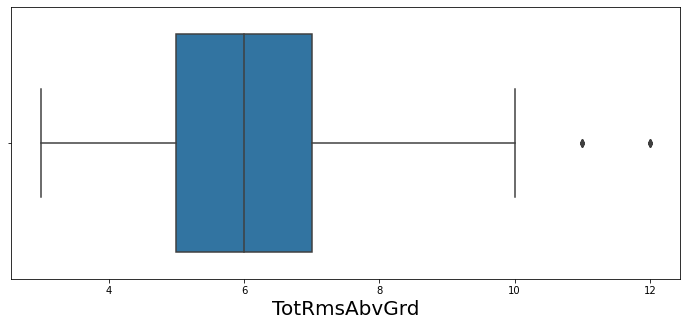

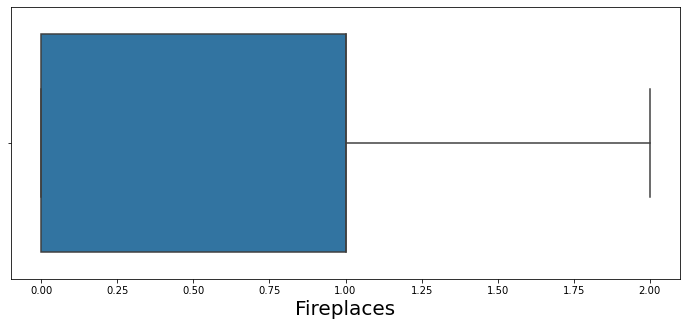

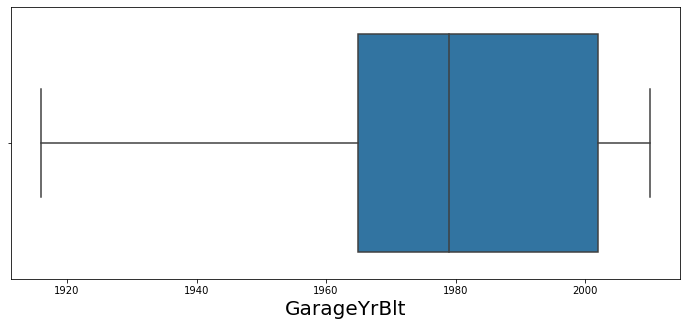

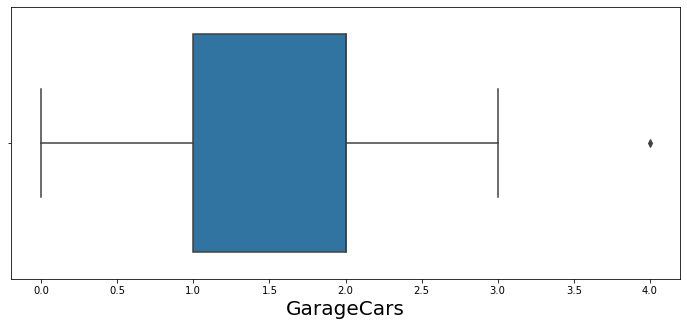

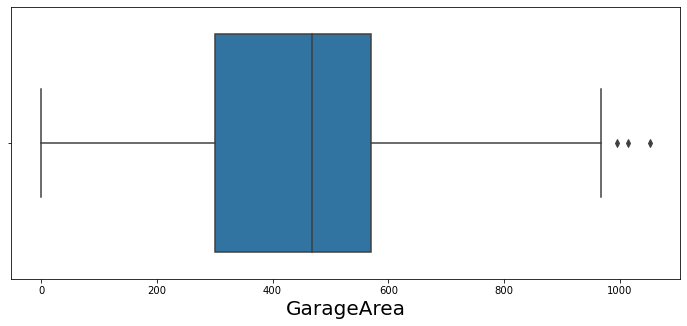

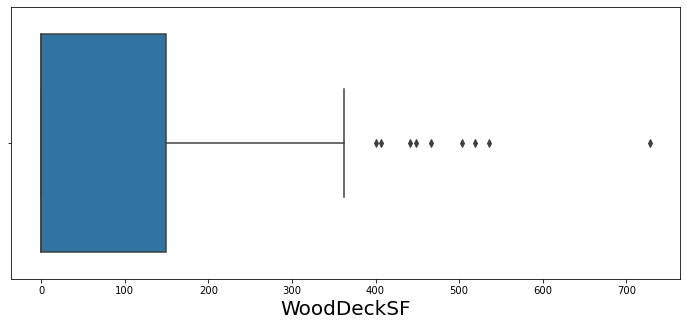

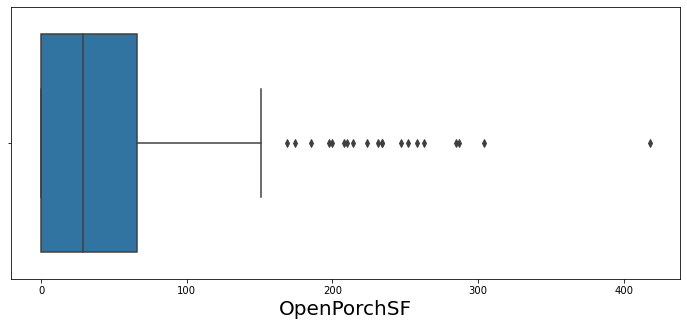

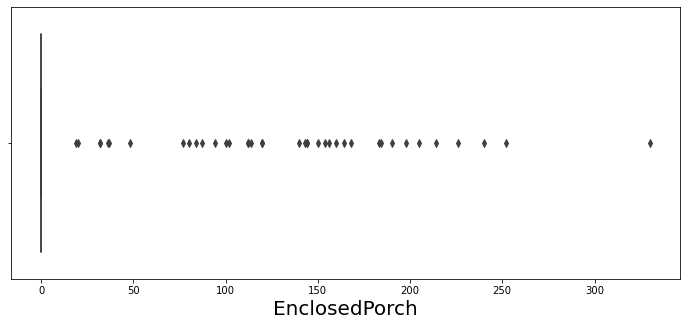

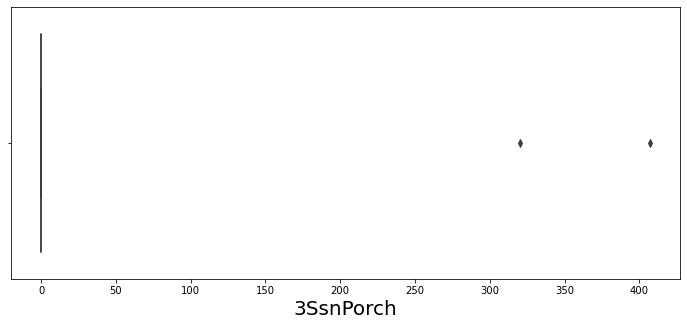

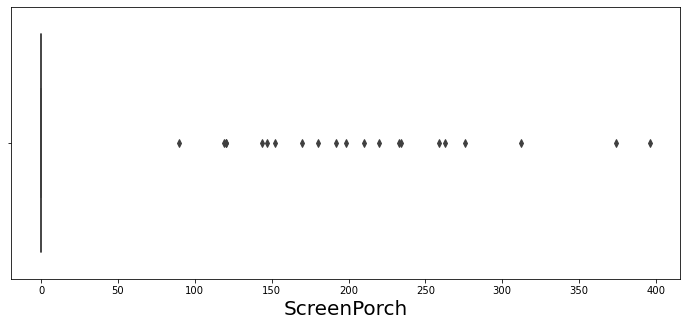

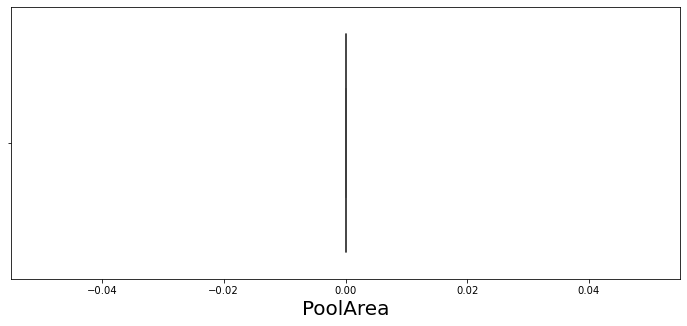

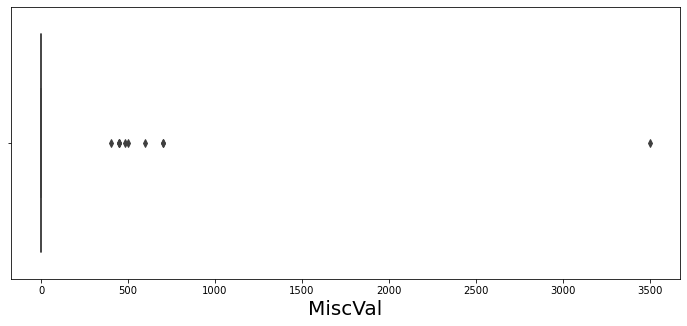

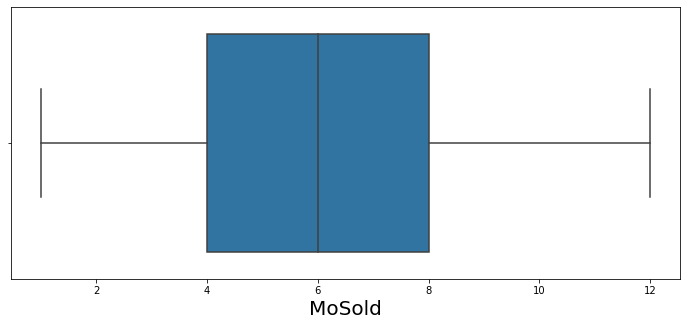

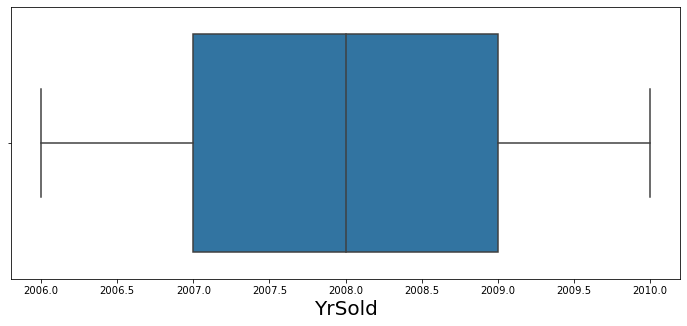

In [338]:
#To check the distribution of the outliers
for i in test_data.columns:
    if test_data.dtypes[i] !='object':
        plt.figure(figsize=[12,5])
        sns.boxplot(test_data[i])
        plt.xlabel(i,fontsize=20)
    plt.show()

In [357]:
#Columns with outliers

features = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
'1stFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
'ScreenPorch','MiscVal']

In [358]:
#To remove the outliers

from scipy.stats import zscore  #importing zscore from library

z=np.abs(zscore(test_data[features]))
threshold = 3
data_new2 = test_data[(z<3).all(axis=1)]

In [359]:
data = data_new2.copy()

In [362]:
#To remove skewness
print(data[continuous_feature].skew())


LotFrontage     -0.117302
LotArea          1.809089
MasVnrArea       1.538571
BsmtFinSF1       0.708755
BsmtFinSF2       4.288535
BsmtUnfSF        0.899297
TotalBsmtSF      0.185716
1stFlrSF         0.707651
2ndFlrSF         0.721449
GrLivArea        0.615259
GarageArea       0.114929
WoodDeckSF       1.162212
OpenPorchSF      1.581460
EnclosedPorch    3.182308
ScreenPorch      5.446228
dtype: float64


In [363]:

skewed_data = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
'1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
'ScreenPorch']

In [364]:
#Let's reduce the skewness by using the Powertransformation method

from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')
for i in skewed_data:
    data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))

    #data[i] = np.log1p(data[i])

In [365]:
for i in data.columns:
    if data.dtypes[i] =='object':
        print(i,'\n',data[i].unique(),'\n')

MSZoning 
 ['RL' 'RM' 'FV' 'C (all)'] 

LotShape 
 ['IR1' 'Reg' 'IR3' 'IR2'] 

LandContour 
 ['HLS' 'Lvl' 'Bnk' 'Low'] 

LotConfig 
 ['Corner' 'CulDSac' 'Inside' 'FR3' 'FR2'] 

LandSlope 
 ['Gtl' 'Mod'] 

Neighborhood 
 ['StoneBr' 'CollgCr' 'Crawfor' 'Somerst' 'MeadowV' 'Edwards' 'NridgHt'
 'BrkSide' 'NAmes' 'Mitchel' 'OldTown' 'Sawyer' 'SWISU' 'Gilbert' 'NWAmes'
 'IDOTRR' 'SawyerW' 'BrDale' 'NPkVill' 'NoRidge' 'Timber' 'Blmngtn'
 'Veenker' 'ClearCr'] 

Condition1 
 ['Norm' 'Feedr' 'Artery' 'RRAe' 'PosN' 'RRAn'] 

Condition2 
 ['Norm' 'RRNn'] 

BldgType 
 ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex'] 

HouseStyle 
 ['1Story' '2Story' 'SFoyer' 'SLvl' '1.5Fin' '1.5Unf'] 

RoofStyle 
 ['Hip' 'Gable' 'Flat' 'Gambrel' 'Mansard'] 

RoofMatl 
 ['CompShg' 'Tar&Grv'] 

Exterior1st 
 ['VinylSd' 'HdBoard' 'MetalSd' 'CemntBd' 'Plywood' 'Wd Sdng' 'AsbShng'
 'BrkComm' 'Stucco' 'BrkFace' 'WdShing'] 

Exterior2nd 
 ['VinylSd' 'HdBoard' 'MetalSd' 'CmentBd' 'Plywood' 'Wd Sdng' 'Brk Cmn'
 'ImStucc' 'AsbShng' 'Stone

In [366]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for i in data.columns:
    if data.dtypes[i] =='object':
        data[i]=le.fit_transform(data[i])

## Make the predictions using the saved model

In [374]:
#Load the saved model

loaded_model = joblib.load(open('House_Price_Prediction.pkl','rb'))

In [375]:


# Predict the Labels using the reloaded Model
Predictions = loaded_model.predict(data)


In [376]:
#create dataframe of actual and predicted values

list_of_tuples = list(zip(Predictions))
Result = pd.DataFrame(list_of_tuples,
                  columns = ['House_Price'])



-------------